# CoverMyMeds Project
### Authors: Shuo Xu

### Abstract

#### Import packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Import data

In [2]:
df_bridge = pd.read_csv('bridge.csv')
df_claims = pd.read_csv('dim_claims.csv')
df_date = pd.read_csv('dim_date.csv')
df_pa = pd.read_csv('dim_pa.csv')

In [3]:
df_bridge.head()

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1


In [4]:
df_bridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dim_claim_id  1335576 non-null  int64  
 1   dim_pa_id     555951 non-null   float64
 2   dim_date_id   1335576 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 MB


In [5]:
df_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1


In [6]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [7]:
df_pa.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1


In [8]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555951 entries, 0 to 555950
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   dim_pa_id          555951 non-null  int64
 1   correct_diagnosis  555951 non-null  int64
 2   tried_and_failed   555951 non-null  int64
 3   contraindication   555951 non-null  int64
 4   pa_approved        555951 non-null  int64
dtypes: int64(5)
memory usage: 21.2 MB


In [9]:
df_date.head()

,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,2017-01-02,2017,1,2,2,1,0,0
2,3,2017-01-03,2017,1,3,3,1,1,0
3,4,2017-01-04,2017,1,4,4,1,1,0
4,5,2017-01-05,2017,1,5,5,1,1,0


In [10]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dim_date_id     1520 non-null   int64 
 1   date_val        1520 non-null   object
 2   calendar_year   1520 non-null   int64 
 3   calendar_month  1520 non-null   int64 
 4   calendar_day    1520 non-null   int64 
 5   day_of_week     1520 non-null   int64 
 6   is_weekday      1520 non-null   int64 
 7   is_workday      1520 non-null   int64 
 8   is_holiday      1520 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 107.0+ KB


#### Logistic Regression with Interaction Terms

In [11]:
#merge tables
dim = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])
dim = pd.merge(dim, df_date, how="left", on=["dim_date_id"])
dim = pd.merge(df_pa,dim,how="left", on=["dim_pa_id"])
dim.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1,1,0,1,1,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
1,2,1,0,0,1,3,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
2,3,0,0,1,1,10,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
3,4,1,1,0,1,11,1,999001,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
4,5,0,1,0,1,15,1,417614,A,70.0,0,2017-01-01,2017,1,1,1,0,0,1


In [46]:
df_X = pd.DataFrame({
                    "pa_approved": dim['pa_approved'],
                    "correct_diagnosis": dim['correct_diagnosis'],
                    "tried_and_failed": dim['tried_and_failed'],
                    "contraindication": dim['contraindication'],
                    "417380": C417380,
                    "417614": pd.get_dummies(dim.bin)[417614].values.tolist(),
                    "999001": pd.get_dummies(dim.bin)[999001].values.tolist(),
                    "417740": pd.get_dummies(dim.bin)[417740].values.tolist(),
                    "A": pd.get_dummies(dim.drug)['A'].values.tolist(),
                    "B": pd.get_dummies(dim.drug)['B'].values.tolist(),
                    "C": pd.get_dummies(dim.drug)['C'].values.tolist(),
                    "70": pd.get_dummies(dim.reject_code)[70.0].values.tolist(),
                    "75": pd.get_dummies(dim.reject_code)[75.0].values.tolist(),
                    "76": pd.get_dummies(dim.reject_code)[76.0].values.tolist()
                    })
df_X.head()

,pa_approved,correct_diagnosis,tried_and_failed,contraindication,417380,417614,999001,417740,A,B,C,70,75,76
0,1,1,1,0,1,0,0,0,1,0,0,0,1,0
1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
2,1,0,0,1,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,0,0,1,0,1,0,0,0,0,1
4,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [50]:
df_X['417380_cd'] = df_X['417380']*df_X.correct_diagnosis
df_X['417614_cd'] = df_X['417614']*df_X.correct_diagnosis
df_X['999001_cd'] = df_X['999001']*df_X.correct_diagnosis
df_X['417740_cd'] = df_X['417740']*df_X.correct_diagnosis
df_X['A_cd'] = df_X['A']*df_X.correct_diagnosis
df_X['B_cd'] = df_X['B']*df_X.correct_diagnosis
df_X['C_cd'] = df_X['C']*df_X.correct_diagnosis
df_X['70_cd'] = df_X['70']*df_X.correct_diagnosis
df_X['75_cd'] = df_X['75']*df_X.correct_diagnosis
df_X['76_cd'] = df_X['76']*df_X.correct_diagnosis

In [51]:
df_X['417380_tf'] = df_X['417380']*df_X.tried_and_failed
df_X['417614_tf'] = df_X['417614']*df_X.tried_and_failed
df_X['999001_tf'] = df_X['999001']*df_X.tried_and_failed
df_X['417740_tf'] = df_X['417740']*df_X.tried_and_failed
df_X['A_tf'] = df_X['A']*df_X.tried_and_failed
df_X['B_tf'] = df_X['B']*df_X.tried_and_failed
df_X['C_tf'] = df_X['C']*df_X.tried_and_failed
df_X['70_tf'] = df_X['70']*df_X.tried_and_failed
df_X['75_tf'] = df_X['75']*df_X.tried_and_failed
df_X['76_tf'] = df_X['76']*df_X.tried_and_failed

In [52]:
df_X['417380_con'] = df_X['417380']*df_X.contraindication
df_X['417614_con'] = df_X['417614']*df_X.contraindication
df_X['999001_con'] = df_X['999001']*df_X.contraindication
df_X['417740_con'] = df_X['417740']*df_X.contraindication
df_X['A_con'] = df_X['A']*df_X.contraindication
df_X['B_con'] = df_X['B']*df_X.contraindication
df_X['C_con'] = df_X['C']*df_X.contraindication
df_X['70_con'] = df_X['70']*df_X.contraindication
df_X['75_con'] = df_X['75']*df_X.contraindication
df_X['76_con'] = df_X['76']*df_X.contraindication

In [53]:
df_X.head()

,pa_approved,correct_diagnosis,tried_and_failed,contraindication,417380,417614,999001,417740,A,B,...,417380_con,417614_con,999001_con,417740_con,A_con,B_con,C_con,70_con,75_con,76_con
0,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = df_X.iloc[:,1:]
Y = df_X.iloc[:,0]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=False)

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

In [67]:
accs = []
cutoffs =  np.arange(0,1.01,.01)
for cutoff in cutoffs:
    X_train_prob = log_reg.predict_proba(X_train)[:,1]
    Y_train_pred = 1*(X_train_prob>cutoff)
    accs.append(np.sum(Y_train_pred==Y_train)/len(Y_train))

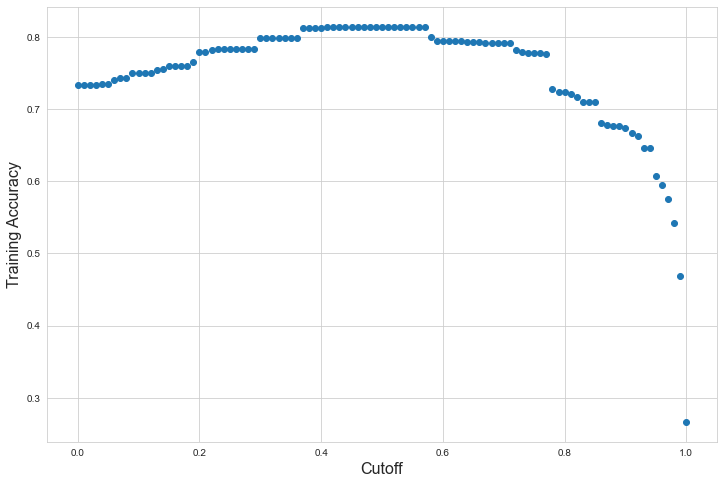

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

In [60]:
X_test_prob = log_reg.predict_proba(X_test)[:,1]
cutoff = 0.5
Y_test_pred = 1*(X_test_prob>cutoff)

In [69]:
X_train_prob = log_reg.predict_proba(X_train)[:,1]
cutoff = 0.5
Y_train_pred = 1*(X_train_prob>cutoff)

In [65]:
print("beta_0_hat is",np.round(log_reg.intercept_,5))
print("beta_1_hat is",np.round(log_reg.coef_[0],5))
len(log_reg.coef_[0])

beta_0_hat is [0.90769]
beta_1_hat is [ 0.17594  0.51113 -1.11133  0.92973 -0.12391  0.66168 -0.57334  1.23967
  0.77679 -1.12231 -2.00309  2.31003  0.58721  0.13843  0.04344 -0.01825
  0.01232  0.03313  0.10238  0.04044  0.04768  0.06273  0.06554  0.21092
  0.12597  0.06925  0.105    0.18435  0.19768  0.12909  0.06793  0.23348
  0.20972 -0.71002 -0.16015 -0.18975 -0.05141 -0.42576 -0.60588 -0.07969
 -0.06163 -0.58525 -0.46445]


43

In [85]:
list_coef =log_reg.coef_[0].tolist() 
print(type(list_coef))
print(type(df_X.columns[1:]))

<class 'list'>
<class 'pandas.core.indexes.base.Index'>


In [86]:
df_fi = pd.DataFrame({
    "Features": df_X.columns[1:],
    "Coefficient": list_coef
})
df_fi.head()

,Features,Coefficient
0,correct_diagnosis,0.175945
1,tried_and_failed,0.511127
2,contraindication,-1.111328
3,417380,0.929726
4,417614,-0.123908


In [88]:
df_fi

,Features,Coefficient
0,correct_diagnosis,0.175945
1,tried_and_failed,0.511127
2,contraindication,-1.111328
3,417380,0.929726
4,417614,-0.123908
5,999001,0.661678
6,417740,-0.573342
7,A,1.239675
8,B,0.776787
9,C,-1.122309


Feature: 0, Score: 0.17594
Feature: 1, Score: 0.51113
Feature: 2, Score: -1.11133
Feature: 3, Score: 0.92973
Feature: 4, Score: -0.12391
Feature: 5, Score: 0.66168
Feature: 6, Score: -0.57334
Feature: 7, Score: 1.23967
Feature: 8, Score: 0.77679
Feature: 9, Score: -1.12231
Feature: 10, Score: -2.00309
Feature: 11, Score: 2.31003
Feature: 12, Score: 0.58721
Feature: 13, Score: 0.13843
Feature: 14, Score: 0.04344
Feature: 15, Score: -0.01825
Feature: 16, Score: 0.01232
Feature: 17, Score: 0.03313
Feature: 18, Score: 0.10238
Feature: 19, Score: 0.04044
Feature: 20, Score: 0.04768
Feature: 21, Score: 0.06273
Feature: 22, Score: 0.06554
Feature: 23, Score: 0.21092
Feature: 24, Score: 0.12597
Feature: 25, Score: 0.06925
Feature: 26, Score: 0.10500
Feature: 27, Score: 0.18435
Feature: 28, Score: 0.19768
Feature: 29, Score: 0.12909
Feature: 30, Score: 0.06793
Feature: 31, Score: 0.23348
Feature: 32, Score: 0.20972
Feature: 33, Score: -0.71002
Feature: 34, Score: -0.16015
Feature: 35, Score: -0

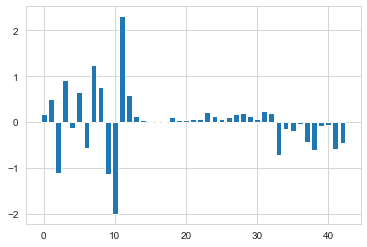

In [66]:
importance = log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_test_pred)

0.8139047975364779

In [70]:
accuracy_score(Y_train, Y_train_pred)

0.8141633670133801

#### Time Series of Claims

In [11]:
result1 = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])
df_claims_ts = pd.merge(result1, df_date, how = "inner", on = ["dim_date_id"])

In [12]:
df_claims_ts.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1


In [13]:
df_claims_ts.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\Claims_Time_Series.csv', index = False)

#### Time Series of PA

In [14]:
result2 = pd.merge(df_bridge, df_pa, how="inner", on=["dim_pa_id"])
df_pa_ts = pd.merge(result2, df_date, how = "inner", on = ["dim_date_id"])

In [15]:
df_pa_ts.head()

,dim_claim_id,dim_pa_id,dim_date_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1.0,1,1,1,0,1,2017-01-01,2017,1,1,1,0,0,1
1,3,2.0,1,1,0,0,1,2017-01-01,2017,1,1,1,0,0,1
2,10,3.0,1,0,0,1,1,2017-01-01,2017,1,1,1,0,0,1
3,11,4.0,1,1,1,0,1,2017-01-01,2017,1,1,1,0,0,1
4,15,5.0,1,0,1,0,1,2017-01-01,2017,1,1,1,0,0,1


In [16]:
df_pa_ts.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\PA_Time_Series.csv', index = False)

#### Time Series of All

In [17]:
df = pd.merge(df_claims_ts, df_pa, how = "left", on = ["dim_pa_id"])

In [18]:
df.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,1.0,0.0,1.0
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,0.0,0.0,1.0
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN


In [19]:
df.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\All_Time_Series.csv', index = False)

## Exploratory Analysis

In [20]:
df.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,1.0,0.0,1.0
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,0.0,0.0,1.0
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335576 entries, 0 to 1335575
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   dim_pa_id                555951 non-null   float64
 2   dim_date_id              1335576 non-null  int64  
 3   bin                      1335576 non-null  int64  
 4   drug                     1335576 non-null  object 
 5   reject_code              555951 non-null   float64
 6   pharmacy_claim_approved  1335576 non-null  int64  
 7   date_val                 1335576 non-null  object 
 8   calendar_year            1335576 non-null  int64  
 9   calendar_month           1335576 non-null  int64  
 10  calendar_day             1335576 non-null  int64  
 11  day_of_week              1335576 non-null  int64  
 12  is_weekday               1335576 non-null  int64  
 13  is_workday               1335576 non-null 

#### Get the list of Companies

In [22]:
Companies = []
for i in range(len(df.bin.unique())):
    Companies.append(str(df.bin.unique()[i]))
Companies

['417380', '999001', '417740', '417614']

#### Get the list of Drugs

In [23]:
Drugs = []
for i in range(len(df.drug.unique())):
    Drugs.append(df.drug.unique()[i])
Drugs

['A', 'B', 'C']

#### Get the list of Rejection Codes.

In [24]:
Rej_Codes = []
for i in range(len(df.reject_code.unique())):
    Rej_Codes.append(df.reject_code.unique()[i])
Rej_Codes = list(filter(lambda x: str(x) != 'nan', Rej_Codes))
Rej_Codes

[75.0, 76.0, 70.0]

#### Get the Years

In [25]:
Years = []
for i in range(len(df.calendar_year.unique())):
    Years.append(df.calendar_year.unique()[i])
Years

[2017, 2018, 2019]

## Graphs

#### Graph the claim approval rates for each drug.

In [26]:
App_Rate_Drugs = []
for i in range(len(Drugs)):
    app = df[(df.drug==Drugs[i])]['pharmacy_claim_approved'].sum()
    tot = df[(df.drug==Drugs[i])]['pharmacy_claim_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Drugs.append(rate)
App_Rate_Drugs

[0.58, 0.55, 0.64]

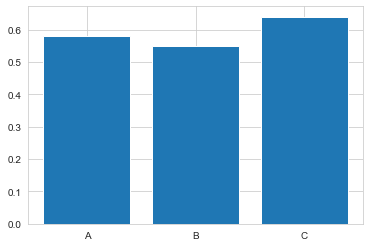

In [27]:
plt.bar(Drugs, App_Rate_Drugs)
plt.show()

#### Graph the approval rates for each insurance company.

In [28]:
App_Rate_Companies = []
for i in range(len(Companies)):
    app = df[(df.bin==int(Companies[i]))]['pharmacy_claim_approved'].sum()
    tot = df[(df.bin==int(Companies[i]))]['pharmacy_claim_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Companies.append(rate)
App_Rate_Companies

[0.23, 0.9, 0.46, 0.21]

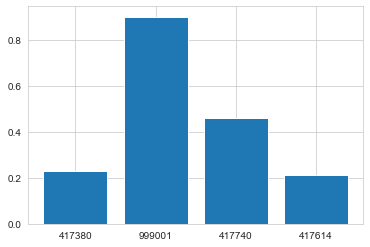

In [29]:
plt.bar(Companies, App_Rate_Companies)
plt.show()

#### Get the pa approval rates for each diagnosis status.

#### Get the list of diagnosis status.

In [30]:
Diag_Statuses = []
for i in range(len(df.correct_diagnosis.unique())):
    Diag_Statuses.append(str(df.correct_diagnosis.unique()[i]))
Diag_Statuses = list(filter(lambda x: str(x) != 'nan', Diag_Statuses))
Diag_Statuses

['1.0', '0.0']

In [31]:
App_Rate_Diags = []
for i in range(len(Diag_Statuses)):
    app = df[(df.correct_diagnosis==float(Diag_Statuses[i]))]['pa_approved'].sum()
    tot = df[(df.correct_diagnosis==float(Diag_Statuses[i]))]['pa_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Diags.append(rate)
App_Rate_Diags

[0.74, 0.7]

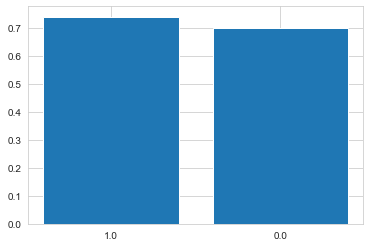

In [32]:
plt.bar(Diag_Statuses, App_Rate_Diags)
plt.show()

#### Get the pa approval rate for each tried_and_failed status.

#### Get the list of tried and failed status.

In [33]:
TF_Statuses = []
for i in range(len(df.tried_and_failed.unique())):
    TF_Statuses.append(str(df.tried_and_failed.unique()[i]))
TF_Statuses = list(filter(lambda x: str(x) != 'nan', TF_Statuses))
TF_Statuses

['1.0', '0.0']

In [34]:
test = df_pa.groupby('tried_and_failed')["pa_approved"].sum()/df_pa.tried_and_failed.value_counts()
test = test.to_numpy()

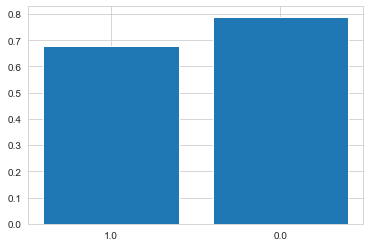

In [35]:
plt.bar(TF_Statuses, test)
plt.show()

#### Get the pa approval rate for each contraindiction status.

In [36]:
Contra_Statuses = []
for i in range(len(df.contraindication.unique())):
    Contra_Statuses.append(str(df.contraindication.unique()[i]))
Contra_Statuses = list(filter(lambda x: str(x) != 'nan', Contra_Statuses))
Contra_Statuses

['0.0', '1.0']

In [37]:
test = df_pa.groupby('contraindication')["pa_approved"].sum()/df_pa.contraindication.value_counts()
test = test.to_numpy()

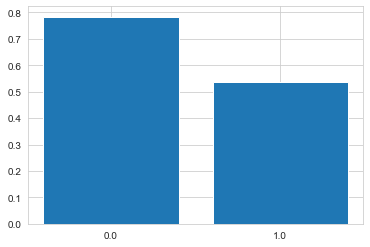

In [38]:
plt.bar(Contra_Statuses, test)
plt.show()

#### Get the pa approval rates for each rejection code. We need to join the claim table and the pa table.

In [39]:
result1 = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])

In [40]:
result1.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1.0,1,417380,A,75.0,0
1,2,NaN,1,999001,A,NaN,1
2,3,2.0,1,417740,A,76.0,0
3,4,NaN,1,999001,A,NaN,1
4,5,NaN,1,417740,A,NaN,1


In [41]:
result2 = pd.merge(df_pa,result1,how="left", on=["dim_pa_id"])

In [42]:
result2.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1,1,0,1,1,1,417380,A,75.0,0
1,2,1,0,0,1,3,1,417740,A,76.0,0
2,3,0,0,1,1,10,1,417380,A,75.0,0
3,4,1,1,0,1,11,1,999001,A,76.0,0
4,5,0,1,0,1,15,1,417614,A,70.0,0


In [43]:
test = result2.groupby('reject_code')["pa_approved"].sum()/result2.reject_code.value_counts()
test = test.to_numpy()

In [44]:
result2.reject_code.value_counts()

70.0    252206
75.0    217351
76.0     86394
Name: reject_code, dtype: int64

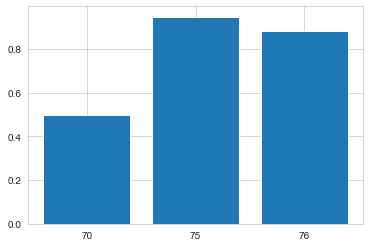

In [45]:
plt.bar(['70','75','76'], test)
plt.show()

#### Get the pa approval rate for each company

In [46]:
test = result2.groupby('bin')["pa_approved"].sum()/result2.bin.value_counts()
test = test.to_numpy()

In [47]:
result2.bin.value_counts()

417614    242268
417380    133579
417740    116031
999001     64073
Name: bin, dtype: int64

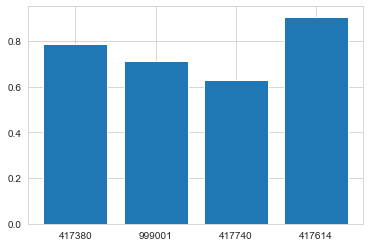

In [48]:
plt.bar(Companies, test)
plt.show()

#### Get the pa approval rate for each drug

In [49]:
test = result2.groupby('drug')["pa_approved"].sum()/result2.drug.value_counts()
test = test.to_numpy()

In [50]:
result2.drug.value_counts()

A    288292
B    154512
C    113147
Name: drug, dtype: int64

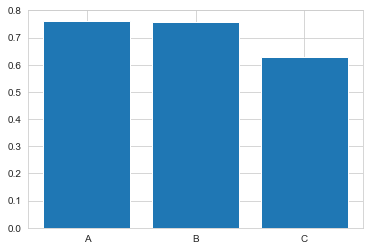

In [51]:
plt.bar(Drugs, test)
plt.show()

## Times Series Graphs

#### Variation of Claims Approval Rates over Time:

In [52]:
Claims_rates = np.zeros((len(Companies),len(Drugs),len(Years)))

In [53]:
for i in range(len(Companies)):
    for j in range(len(Drugs)):
        for k in range(len(Years)):
            app = df_claims_ts[(df_claims_ts.bin == int(Companies[i])) & (df_claims_ts.drug==Drugs[j]) & (df_claims_ts.calendar_year == Years[k])]['pharmacy_claim_approved'].sum()
            tot = df_claims_ts[(df_claims_ts.bin == int(Companies[i])) & (df_claims_ts.drug==Drugs[j]) & (df_claims_ts.calendar_year == Years[k])]['pharmacy_claim_approved'].count()
            rate = round(app/tot,2)
            Claims_rates[i][j][k] = rate

In [54]:
Claims_rates

array([[[0. , 0. , 0. ],
        [0.9, 0.9, 0.9],
        [0. , 0. , 0. ]],

       [[0.9, 0.9, 0.9],
        [0.9, 0.9, 0.9],
        [0.9, 0.9, 0.9]],

       [[0.9, 0.9, 0.9],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0.9, 0.9, 0.9]]])

##### It seems that the Pharmacy Claims policies for each insurance company and each insurance drug are the same over the years.

#### Let's plot some time series data of the claim approval rates over time. First, we convert date to date object.

In [55]:
df_claims_ts['date_val'] = pd.to_datetime(df_claims_ts['date_val'])

#### Time Series in Years

In [56]:
def claim_ts_y(company: int, drug: str, year: int):
    df1 = df_claims_ts.loc[(df_claims_ts['bin']==company) & (df_claims_ts['drug']==drug)]
    df2 = df1.loc[(df1['calendar_year']==year)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

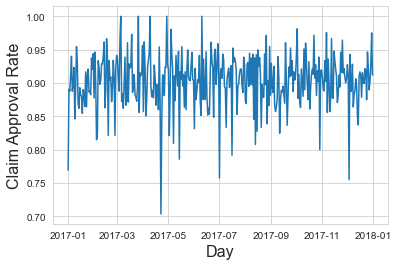

In [57]:
claim_ts_y(417740,'A',2017)

#### Time Series in Months

In [58]:
def claim_ts_y_m(company: int, drug: str, year: int,month:int):
    df1 = df_claims_ts.loc[(df_claims_ts['bin']==company) & (df_claims_ts['drug']==drug)]
    df2 = df1.loc[(df1['calendar_year']==year) & (df1['calendar_month']==month)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

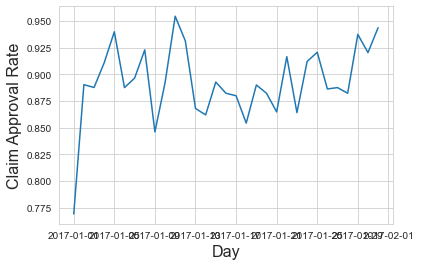

In [59]:
claim_ts_y_m(417740,'A',2017,1)

#### Time Series on/off Workdays

In [60]:
def claim_ts_y_m_w(company: int, drug: str, year: int,month:int,isworkday:int):
    df1 = df_claims_ts.loc[(df_claims_ts['bin']==company) & (df_claims_ts['drug']==drug)]
    df2 = df1.loc[(df1['calendar_year']==year) & (df1['calendar_month']==month) & (df1['is_workday']==isworkday)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

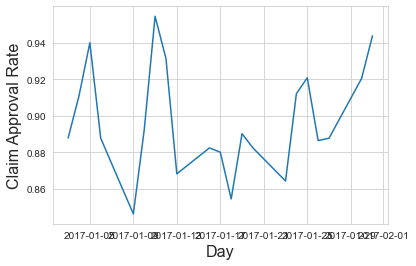

In [61]:
claim_ts_y_m_w(417740,'A',2017,1,1)

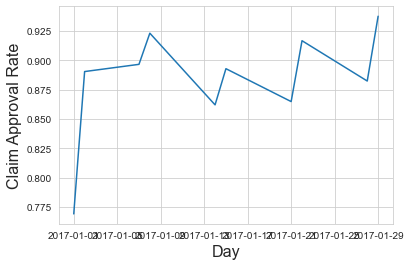

In [62]:
claim_ts_y_m_w(417740,'A',2017,1,0)

#### Variation of PA Approval Rates Over Time

In [63]:
PA_rates = np.zeros((len(Companies),len(Drugs),len(Rej_Codes),len(Years)))

In [64]:
for i in range(len(Companies)):
    for j in range(len(Drugs)):
        for k in range(len(Rej_Codes)):
            for t in range(len(Years)):
                app = df[(df.bin == int(Companies[i])) & (df.drug==Drugs[j]) & (df.reject_code==Rej_Codes[k]) & (df.calendar_year == Years[t])]['pa_approved'].sum()
                tot = df[(df.bin == int(Companies[i])) & (df.drug==Drugs[j]) & (df.reject_code==Rej_Codes[k]) & (df.calendar_year == Years[t])]['pa_approved'].count()
                if not tot:
                    PA_rates[i][j][k][t]=-1
                else:
                    rate = round(app/tot,2)
                    PA_rates[i][j][k][t] = rate

In [65]:
PA_rates

array([[[[ 0.99,  0.99,  0.99],
         [-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [ 0.9 ,  0.91,  0.91],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ],
         [ 0.33,  0.32,  0.33]]],


       [[[-1.  , -1.  , -1.  ],
         [ 0.96,  0.96,  0.96],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [ 0.93,  0.93,  0.94],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [ 0.76,  0.77,  0.75],
         [-1.  , -1.  , -1.  ]]],


       [[[-1.  , -1.  , -1.  ],
         [ 0.9 ,  0.9 ,  0.9 ],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ],
         [ 0.39,  0.39,  0.39]],

        [[ 0.83,  0.84,  0.83],
         [-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ]]],


       [[[-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ],
         [ 0.58,  0.58,  0.59]],

        [[ 0.9

##### It seems that some companies change their pa approval policies over the years.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335576 entries, 0 to 1335575
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   dim_pa_id                555951 non-null   float64
 2   dim_date_id              1335576 non-null  int64  
 3   bin                      1335576 non-null  int64  
 4   drug                     1335576 non-null  object 
 5   reject_code              555951 non-null   float64
 6   pharmacy_claim_approved  1335576 non-null  int64  
 7   date_val                 1335576 non-null  object 
 8   calendar_year            1335576 non-null  int64  
 9   calendar_month           1335576 non-null  int64  
 10  calendar_day             1335576 non-null  int64  
 11  day_of_week              1335576 non-null  int64  
 12  is_weekday               1335576 non-null  int64  
 13  is_workday               1335576 non-null 

In [67]:
def pa_ts_y_m_w(company: int, drug: str, rejcode: float, year: int,month:int,isworkday:int):
    df1 = df.loc[(df['bin']==company) & (df['drug']==drug) & (df['reject_code']==rejcode)]
    df2 = df1.loc[(df1['calendar_year']==year) & (df1['calendar_month']==month) & (df1['is_workday']==isworkday)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

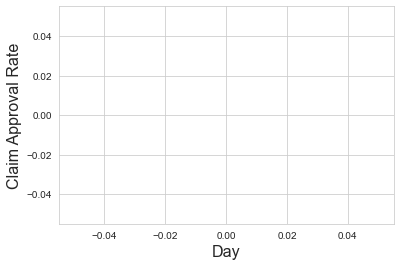

In [68]:
pa_ts_y_m_w(417614,'B',70.0, 2017,10,0)

In [69]:
def pa_ts_y_m(company: int, drug: str, rejcode: float, year: int,month:int):
    df1 = df.loc[(df['bin']==company) & (df['drug']==drug) & (df['reject_code']==rejcode)]
    df2 = df1.loc[(df1['calendar_year']==year) & (df1['calendar_month']==month)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

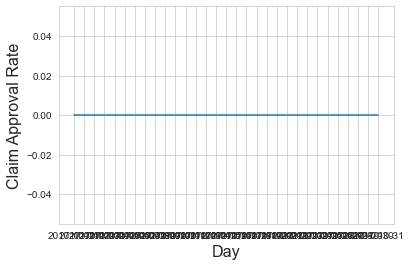

In [70]:
pa_ts_y_m(417614,'C',76.0, 2017,10)

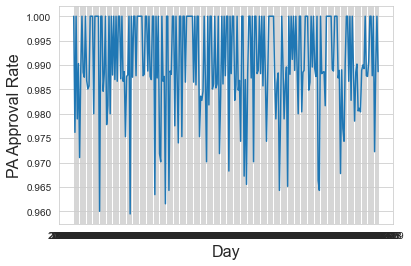

In [71]:
        df1 = df.loc[(df['bin']==417380) & (df['drug']=='A') & (df['reject_code']==75.0)]
        df2 = df1.loc[(df1['calendar_year']==2017) & (df1['is_weekday']==1)]
        df3 = df2[['date_val','pa_approved']]
        df4 = df3.groupby(['date_val']).sum()
        df4.rename(columns = {'pa_approved' : 'app'}, inplace = True)
        df5 = df3.groupby(['date_val']).count()
        df5.rename(columns = {'pa_approved' : 'tot'}, inplace = True)
        df6 = df4.join(df5, how='outer')
        df6['rate'] = df6['app']/df6['tot']
        df7 = df6['rate']
        plt.plot(df7)
        plt.xlabel("Day", fontsize=16)
        plt.ylabel("PA Approval Rate", fontsize=16)
        plt.show()

<AxesSubplot:xlabel='calendar_year,calendar_month'>

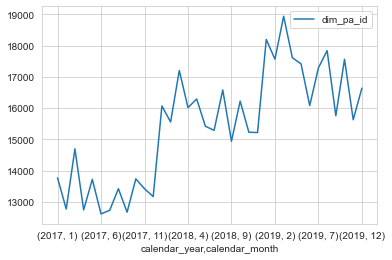

In [72]:
        df3 = df[['dim_pa_id','calendar_year','calendar_month']]
        df4 = df3.groupby(['calendar_year','calendar_month']).count()
        df4.plot()

#### Time Series Analysis Using XGBOOST

In [73]:
df4.head()

dim_pa_id
calendar_year calendar_month           
2017          1                   13766
              2                   12769
              3                   14694
              4                   12742
              5                   13717

In [74]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (2017, 1) to (2019, 12)
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dim_pa_id  36 non-null     int64
dtypes: int64(1)
memory usage: 605.0 bytes


In [75]:
PA_Volume_M = []
for i in range(len(df4['dim_pa_id'])):
    PA_Volume_M.append(df4['dim_pa_id'].iloc[i])
PA_Volume_M

[13766,
 12769,
 14694,
 12742,
 13717,
 12613,
 12730,
 13419,
 12668,
 13734,
 13418,
 13168,
 16066,
 15554,
 17201,
 16014,
 16290,
 15419,
 15286,
 16579,
 14937,
 16222,
 15226,
 15217,
 18195,
 17563,
 18937,
 17611,
 17413,
 16080,
 17286,
 17837,
 15756,
 17560,
 15626,
 16638]

In [76]:
df_m = pd.DataFrame({"PA_Volume_M": PA_Volume_M})
df_m.head()

,PA_Volume_M
0,13766
1,12769
2,14694
3,12742
4,13717


In [77]:
def PA_Volume_M_MAX_Lag(Max_Lag: int):
    d = np.zeros((len(PA_Volume_M),Max_Lag))
    for j in range(Max_Lag):
        for i in range(len(PA_Volume_M)):
            if i<=j:
                d[i,j] = 0
            else:
                d[i,j] = PA_Volume_M[i-(j+1)]
    return d

In [78]:
def PA_Dataframe(Max_Lag: int):
    for i in range(Max_Lag):
        name = 'Lag' + str((i+1))
        df_m[name] = PA_Volume_M_MAX_Lag(Max_Lag)[:,i]
    return df_m

In [79]:
df_m = PA_Dataframe(12)
df_m.tail()

,PA_Volume_M,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11,Lag12
31,17837,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,14937.0,16579.0
32,15756,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,14937.0
33,17560,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0
34,15626,17560.0,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0
35,16638,15626.0,17560.0,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0


In [80]:
X = df_m.iloc[12:,1:]
X_train = X.iloc[0:17,:]
X_test = X.iloc[18:,:]
Y = df_m.iloc[12:,0]
y_train = Y.iloc[0:17]
y_test = Y.iloc[18:]

In [81]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [82]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse')

[0]	validation_0-rmse:16338.94043	validation_1-rmse:16649.88086
[1]	validation_0-rmse:16185.38672	validation_1-rmse:16496.15039
[2]	validation_0-rmse:16033.29394	validation_1-rmse:16343.87891
[3]	validation_0-rmse:15882.64356	validation_1-rmse:16193.04785
[4]	validation_0-rmse:15733.42285	validation_1-rmse:16043.64551
[5]	validation_0-rmse:15585.61914	validation_1-rmse:15895.65820
[6]	validation_0-rmse:15439.21973	validation_1-rmse:15749.07227
[7]	validation_0-rmse:15294.20996	validation_1-rmse:15603.87500
[8]	validation_0-rmse:15150.57715	validation_1-rmse:15460.05273
[9]	validation_0-rmse:15008.30762	validation_1-rmse:15317.59277
[10]	validation_0-rmse:14867.39160	validation_1-rmse:15176.48242
[11]	validation_0-rmse:14727.81250	validation_1-rmse:15036.70801
[12]	validation_0-rmse:14589.56152	validation_1-rmse:14898.25977
[13]	validation_0-rmse:14452.62305	validation_1-rmse:14761.12207
[14]	validation_0-rmse:14316.98633	validation_1-rmse:14625.28418
[15]	validation_0-rmse:14182.63769	

[129]	validation_0-rmse:4926.87695	validation_1-rmse:5192.04492
[130]	validation_0-rmse:4882.86719	validation_1-rmse:5147.40869
[131]	validation_0-rmse:4839.29688	validation_1-rmse:5103.20508
[132]	validation_0-rmse:4796.16016	validation_1-rmse:5059.42920
[133]	validation_0-rmse:4753.45410	validation_1-rmse:5016.07861
[134]	validation_0-rmse:4711.17432	validation_1-rmse:4973.14795
[135]	validation_0-rmse:4669.31787	validation_1-rmse:4930.63477
[136]	validation_0-rmse:4627.87988	validation_1-rmse:4888.53369
[137]	validation_0-rmse:4586.85791	validation_1-rmse:4846.84131
[138]	validation_0-rmse:4546.24658	validation_1-rmse:4805.55420
[139]	validation_0-rmse:4506.04346	validation_1-rmse:4764.66846
[140]	validation_0-rmse:4466.24414	validation_1-rmse:4724.18066
[141]	validation_0-rmse:4426.84570	validation_1-rmse:4684.08691
[142]	validation_0-rmse:4387.84326	validation_1-rmse:4644.38281
[143]	validation_0-rmse:4349.23486	validation_1-rmse:4605.06592
[144]	validation_0-rmse:4311.01611	valid

[258]	validation_0-rmse:1627.03272	validation_1-rmse:1395.25879
[259]	validation_0-rmse:1613.74805	validation_1-rmse:1382.16553
[260]	validation_0-rmse:1600.58106	validation_1-rmse:1367.91370
[261]	validation_0-rmse:1587.53711	validation_1-rmse:1353.87756
[262]	validation_0-rmse:1574.61462	validation_1-rmse:1340.05591
[263]	validation_0-rmse:1561.81213	validation_1-rmse:1326.44861
[264]	validation_0-rmse:1549.13086	validation_1-rmse:1314.31702
[265]	validation_0-rmse:1536.56274	validation_1-rmse:1301.11609
[266]	validation_0-rmse:1524.11182	validation_1-rmse:1288.12793
[267]	validation_0-rmse:1511.77759	validation_1-rmse:1275.35205
[268]	validation_0-rmse:1499.55872	validation_1-rmse:1262.78760
[269]	validation_0-rmse:1487.45666	validation_1-rmse:1251.60437
[270]	validation_0-rmse:1475.46204	validation_1-rmse:1239.44153
[271]	validation_0-rmse:1463.56824	validation_1-rmse:1226.80566
[272]	validation_0-rmse:1451.78455	validation_1-rmse:1214.34607
[273]	validation_0-rmse:1440.10986	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
predictions = reg.predict(X_test)

In [84]:
df_m.head()

,PA_Volume_M,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11,Lag12
0,13766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12769,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14694,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12742,14694.0,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13717,12742.0,14694.0,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
month_list = []
for i in range(36):
    month_list.append((i+1))
df_m['month'] = month_list

In [86]:
df_m.head()

,PA_Volume_M,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11,Lag12,month
0,13766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12769,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,14694,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,12742,14694.0,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,13717,12742.0,14694.0,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [87]:
pred_list = []
for i in range(36):
    if i<30:
        pred_list.append(0)
    else:
        pred_list.append(predictions[(i-30)])

In [88]:
df_m['predictions'] = pred_list

In [89]:
df_m.tail()

,PA_Volume_M,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11,Lag12,month,predictions
31,17837,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,14937.0,16579.0,32,17878.798828
32,15756,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,14937.0,33,16572.001953
33,17560,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,34,16999.347656
34,15626,17560.0,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,35,17878.798828
35,16638,15626.0,17560.0,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,36,17872.148438


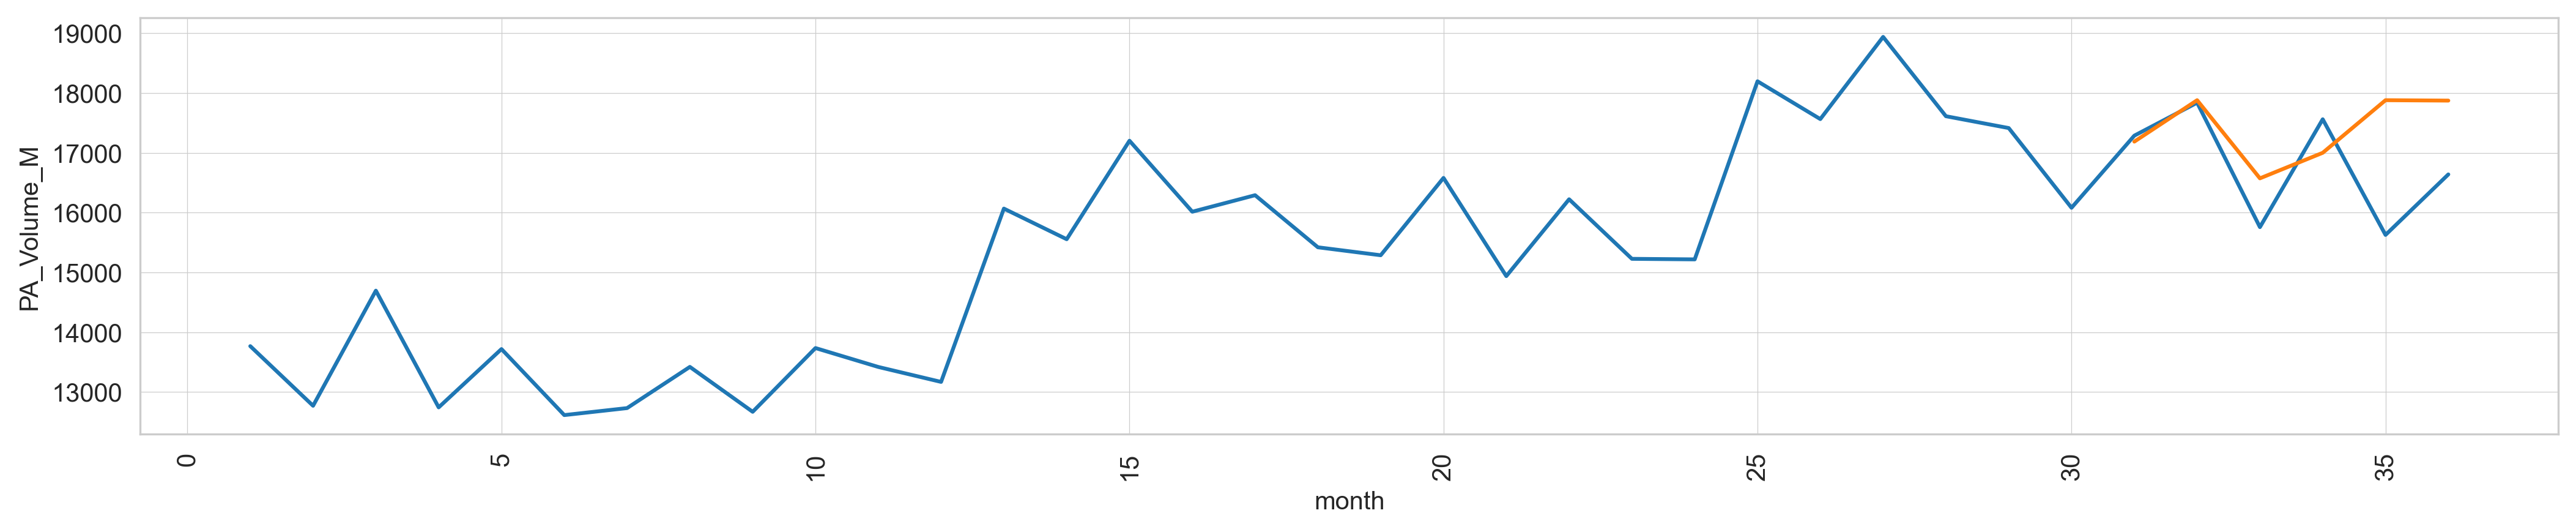

In [90]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_m, x='month', y='PA_Volume_M')
sns.lineplot(data=df_m.tail(6), x='month', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

#### Performance Measures

In [139]:
y_true = df_m.tail(6).PA_Volume_M.values

In [140]:
y_pred = df_m.tail(6).predictions.values

In [141]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)


-0.7320958143576262

In [142]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_true, y_pred))

834.2109375
834.2109375


In [143]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(y_true, y_pred))

688.3271484375


In [144]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_true))

1265022.5618184407


In [91]:
df10 = df_pa_ts[['dim_pa_id','date_val']]
df11 = df10.groupby(['date_val']).count()
df11.head()
df11['date'] = df10.date_val.unique()
df12 = pd.DataFrame({"PA_Volume_D": df11['dim_pa_id'],"date": df11['date']})
len(df12)

1095

In [92]:
df12.head()

,PA_Volume_D,date
date_val,,
2017-01-01,94,2017-01-01
2017-01-02,437,2017-01-02
2017-01-03,614,2017-01-03
2017-01-04,591,2017-01-04
2017-01-05,598,2017-01-05


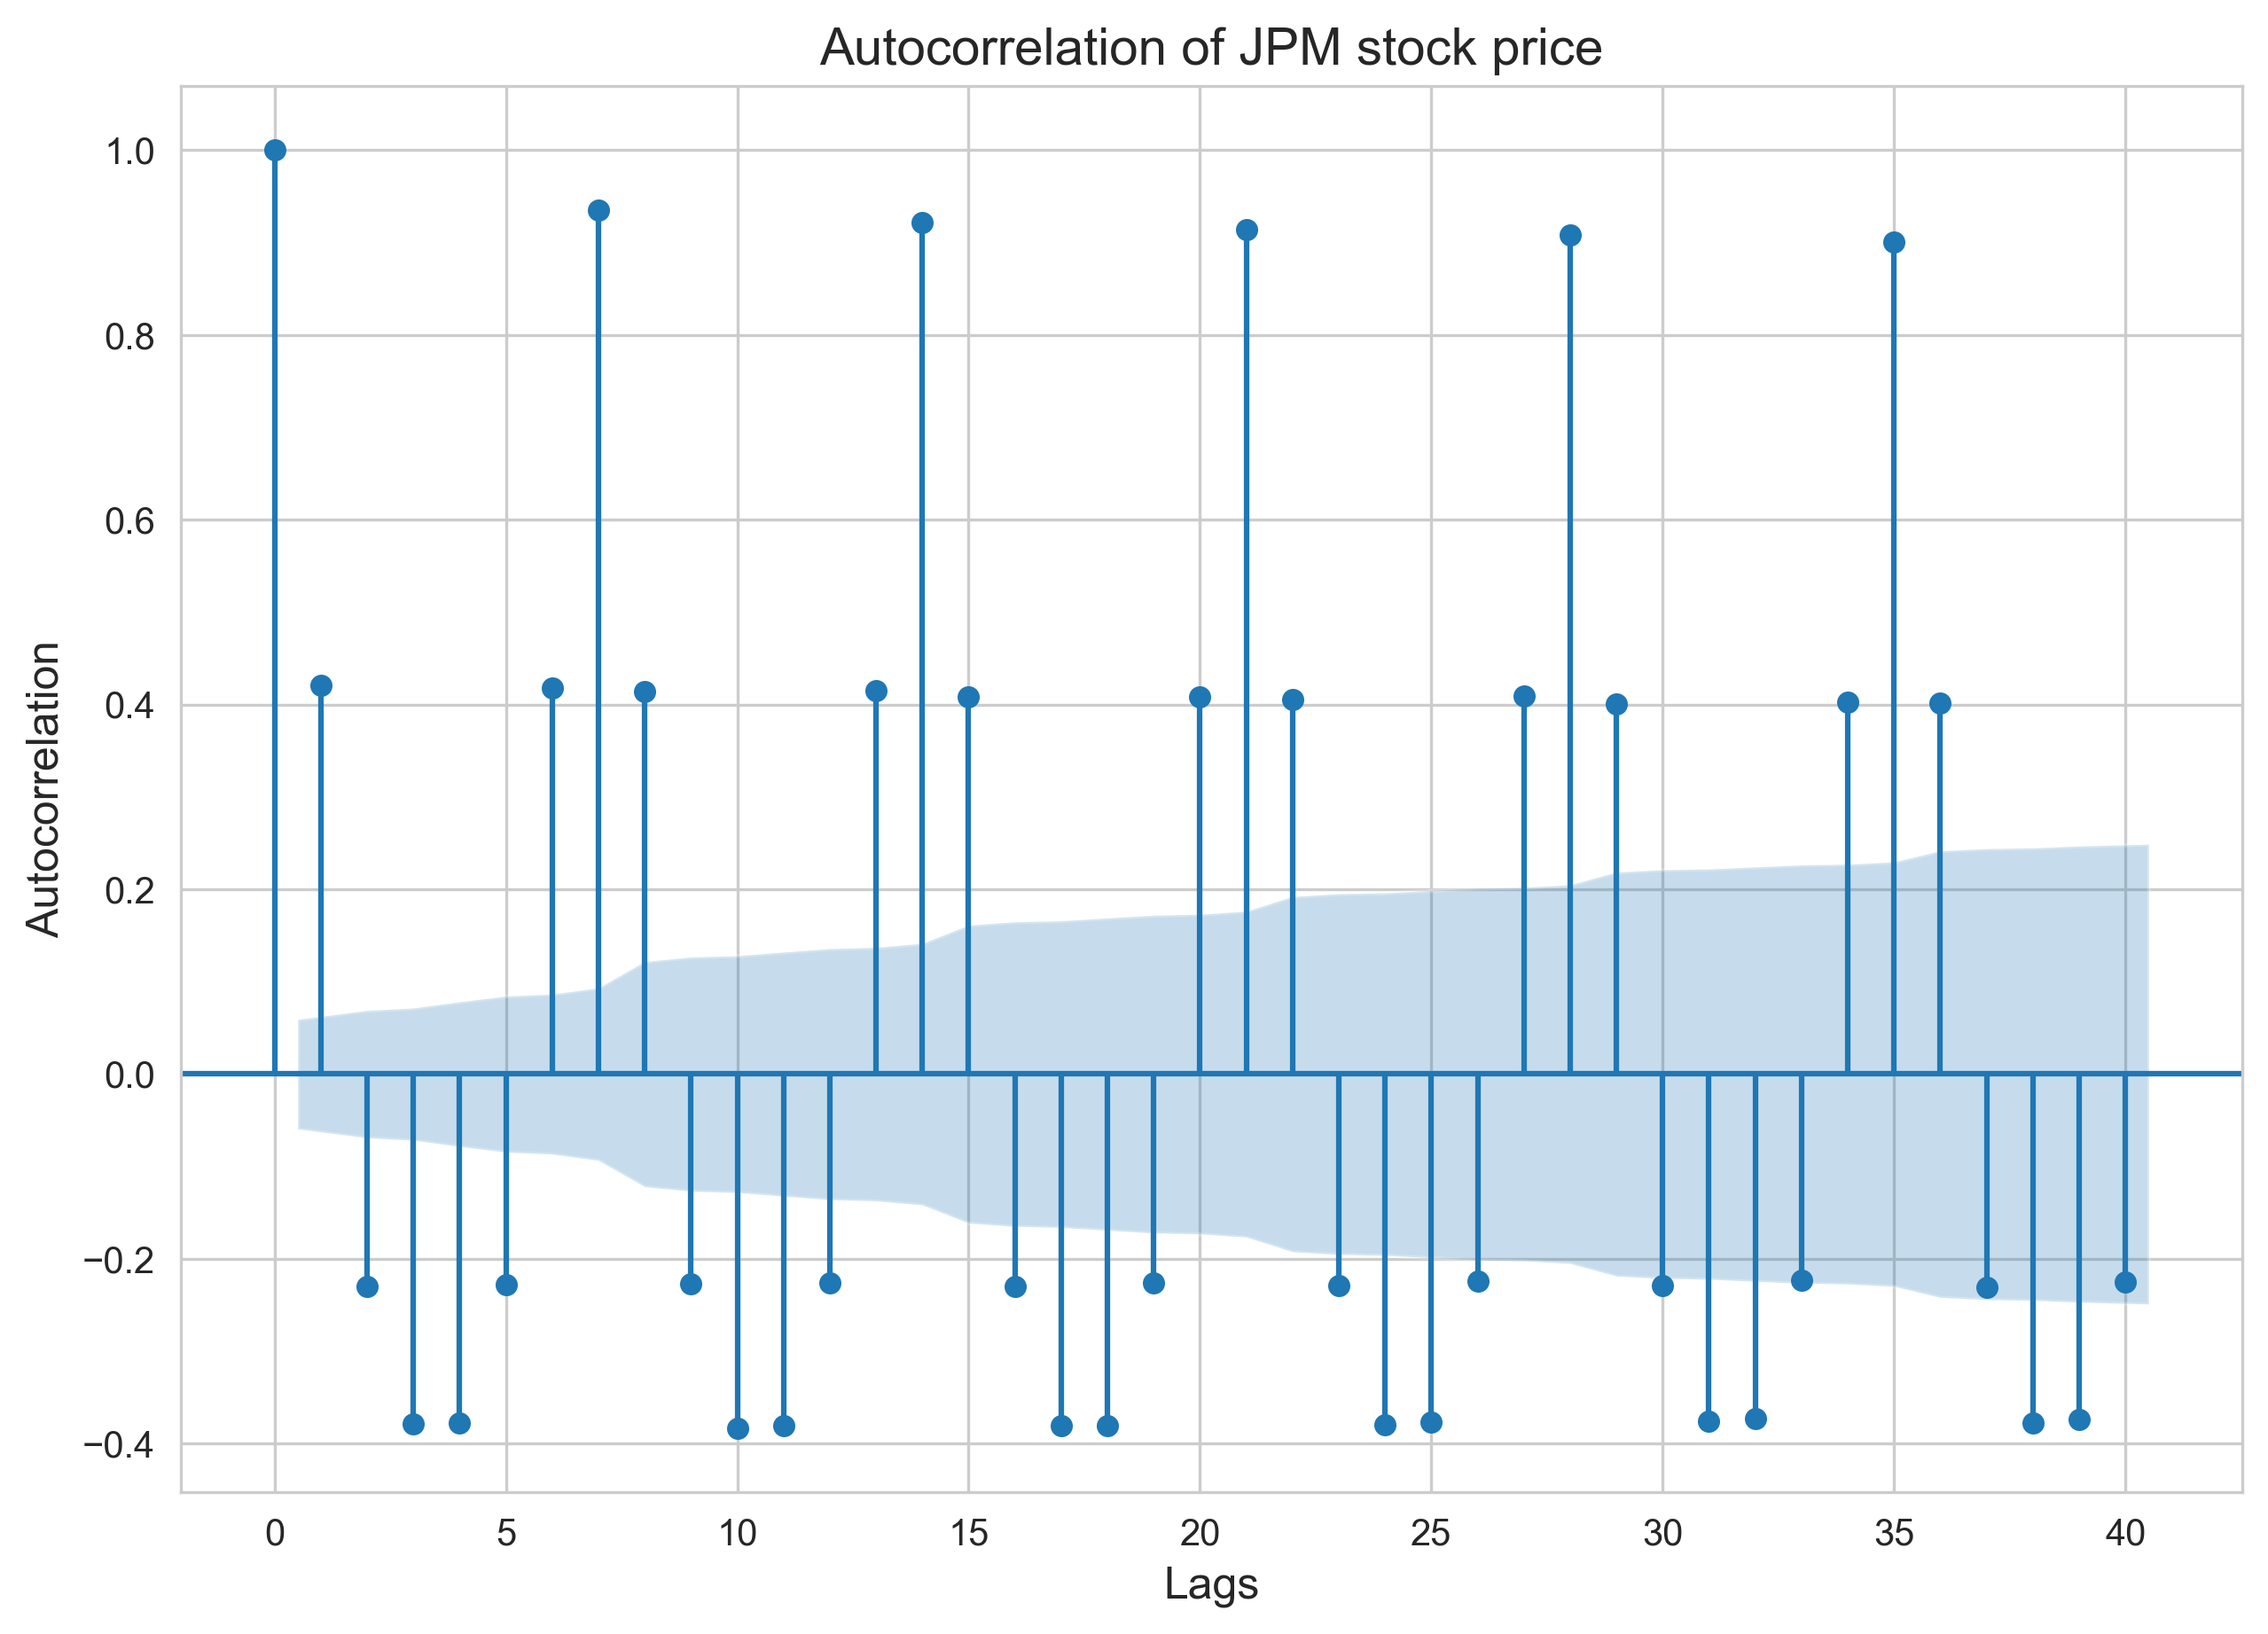

In [93]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(10, 7))
# Plot ACF of JPM stock prices for past 40 lags
plot_acf(df12.PA_Volume_D, lags=40)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Autocorrelation of JPM stock price', fontsize=14)
plt.show()

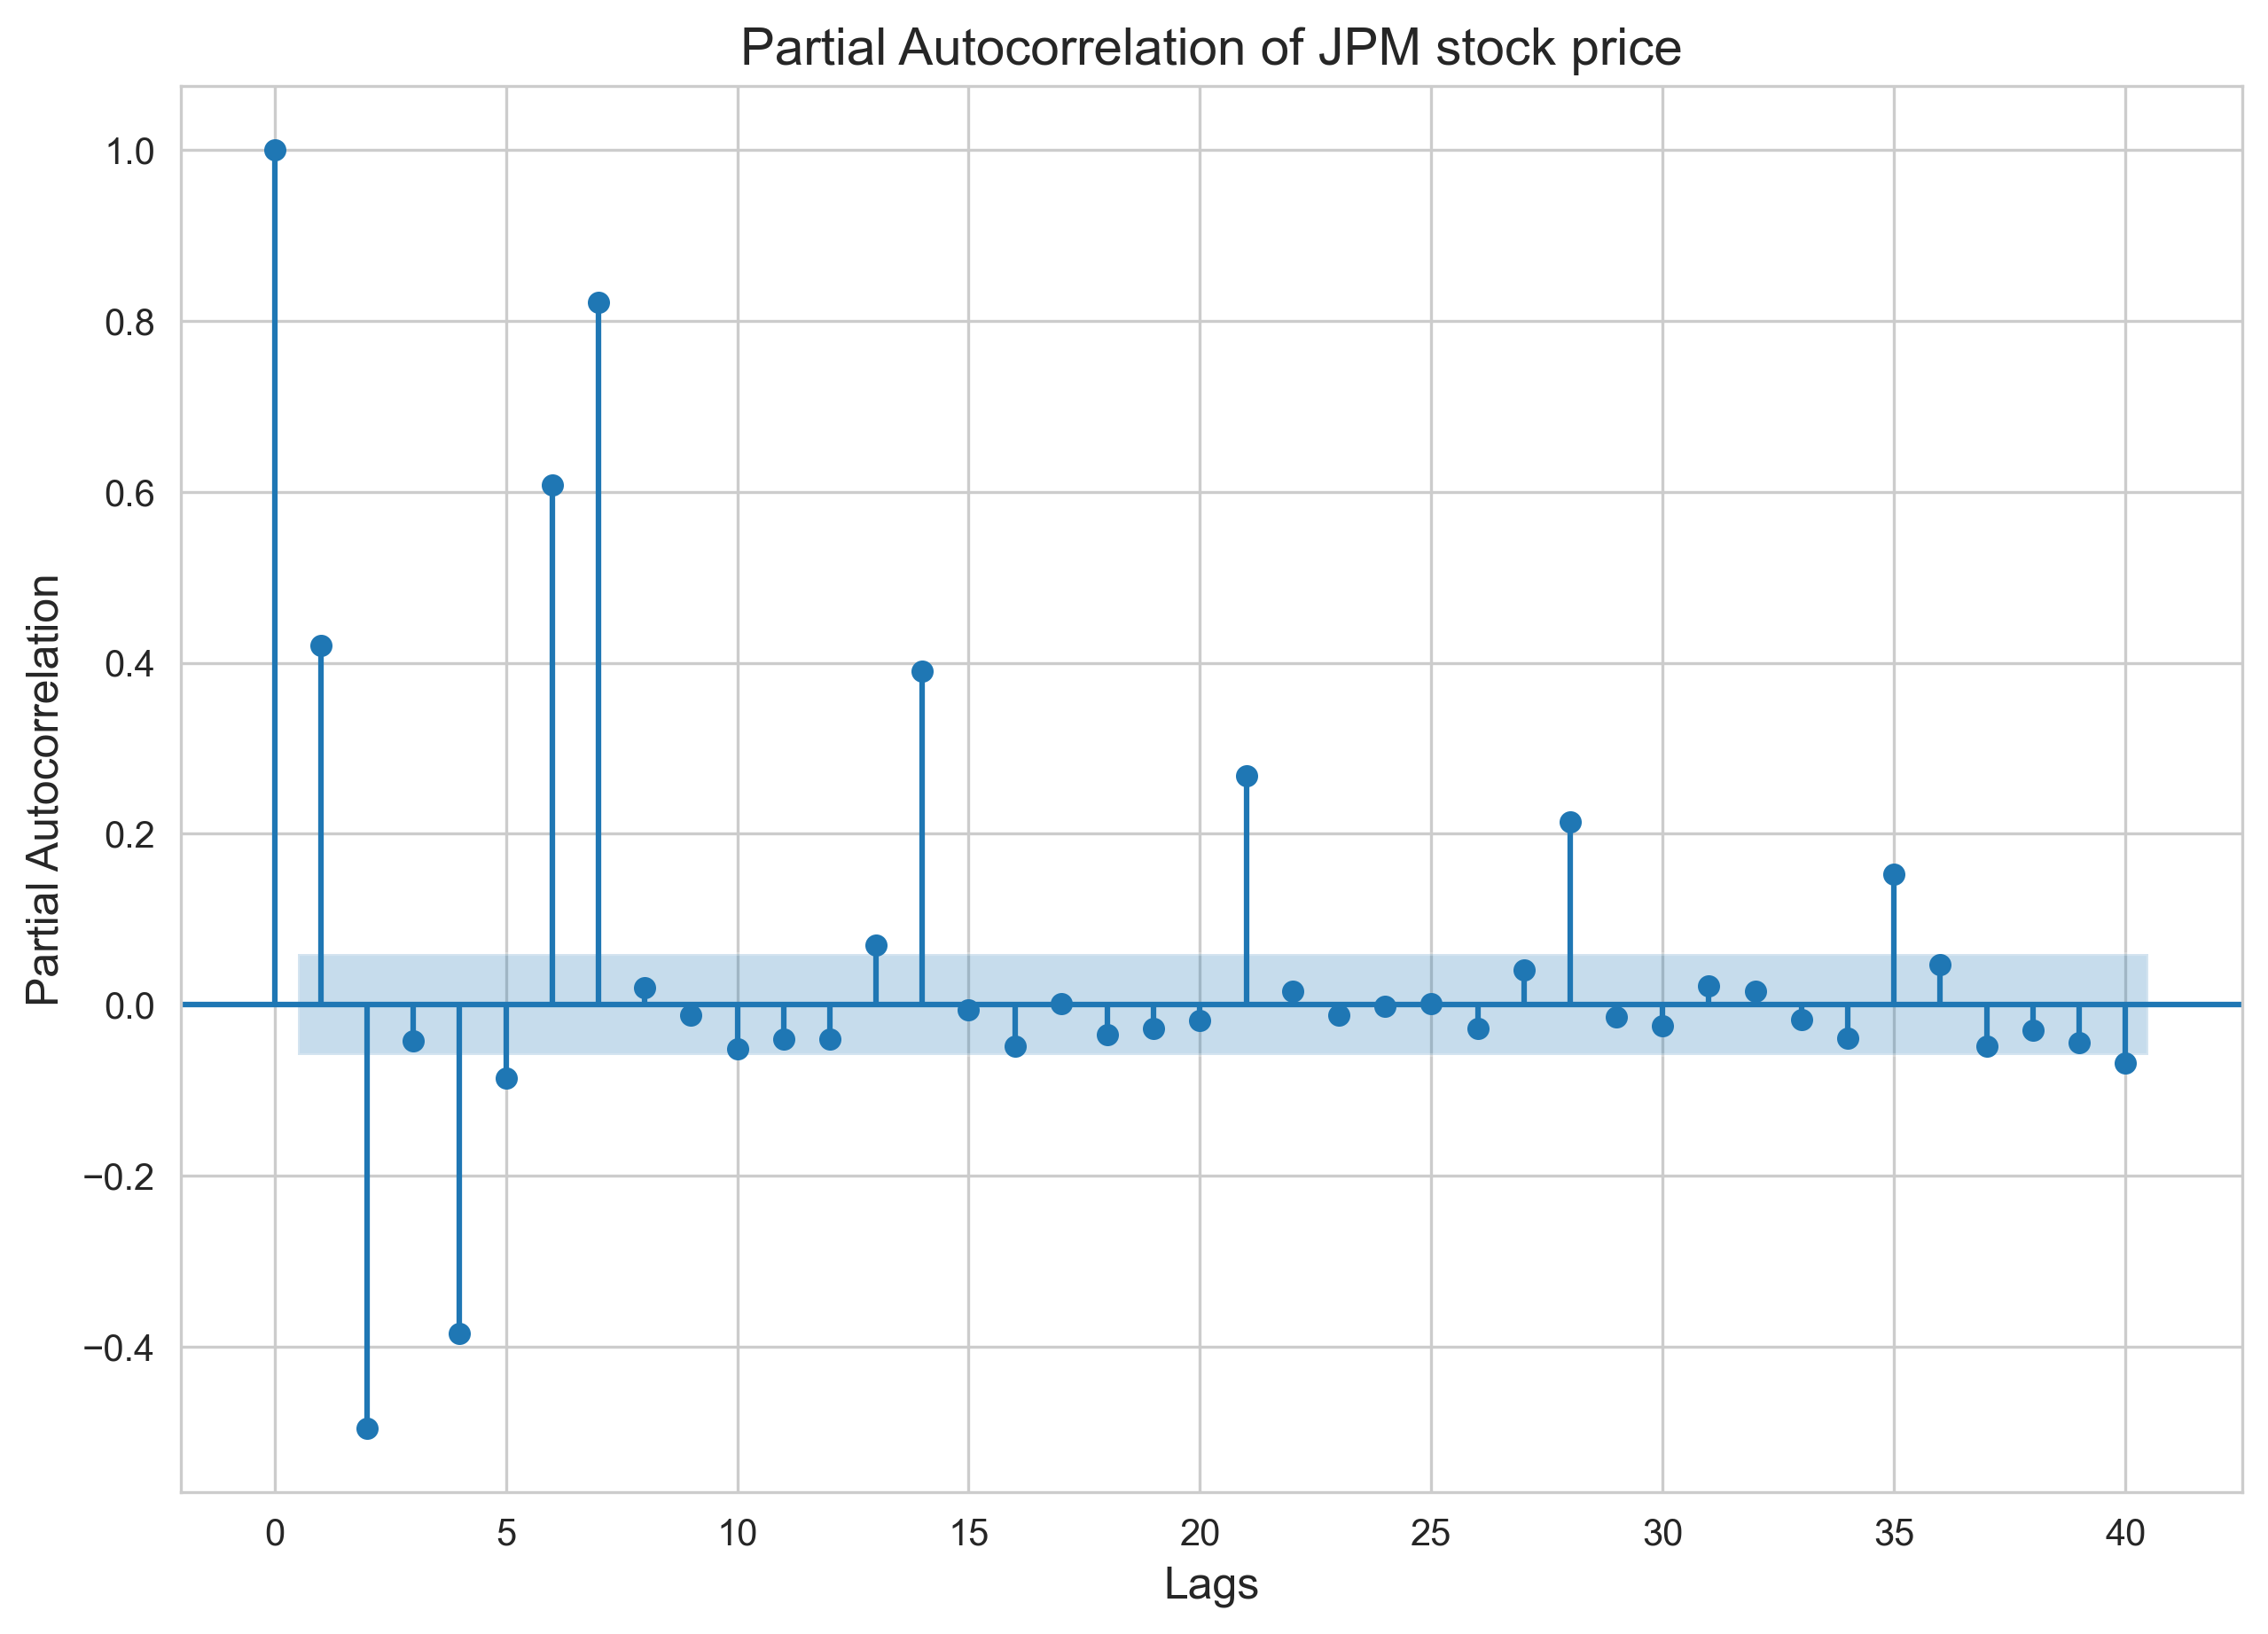

In [94]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF of JPM stock price of past 40 lags
plot_pacf(df12.PA_Volume_D, lags=40)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.title('Partial Autocorrelation of JPM stock price', fontsize=14)
plt.show()

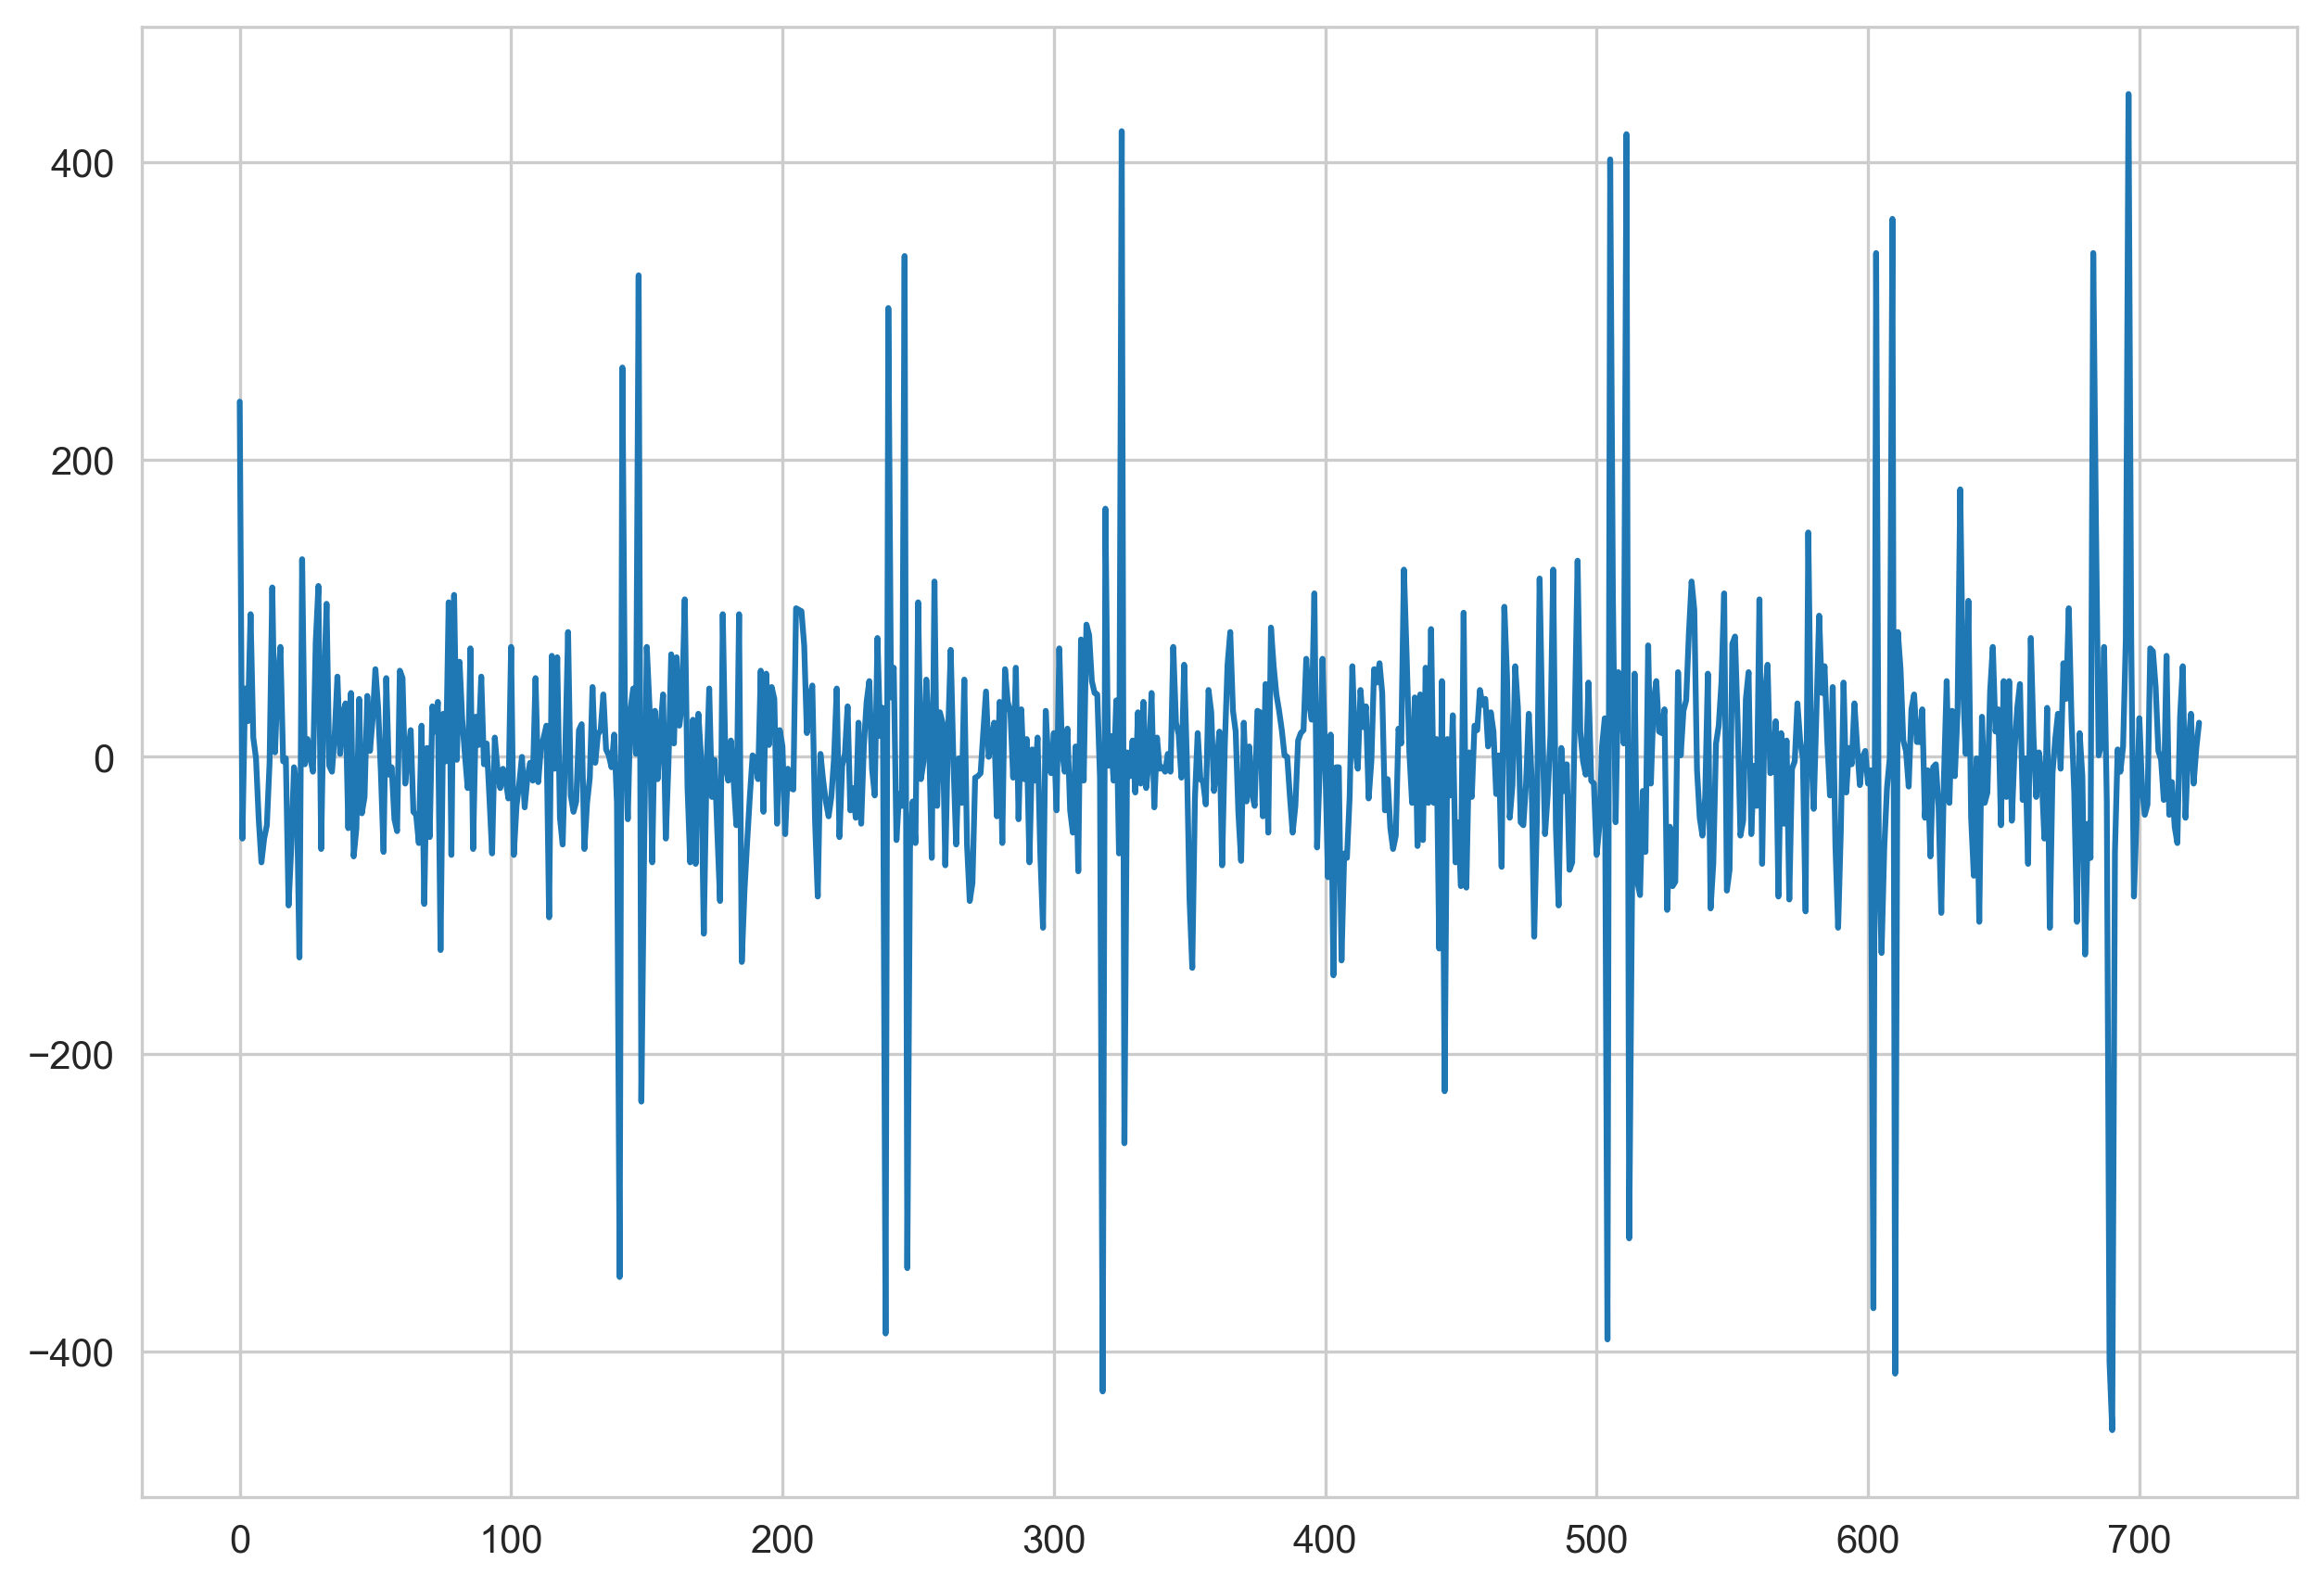

In [96]:
diff365 = list()
for i in range(365, len(df12)):
    value = df12['PA_Volume_D'][i] - df12['PA_Volume_D'][i - 365]
    diff365.append(value)
diff7 = []
for i in range(7,len(diff365)):
    value = diff365[i]-diff365[i-7]
    diff7.append(value)
plt.plot(diff7)
plt.show()


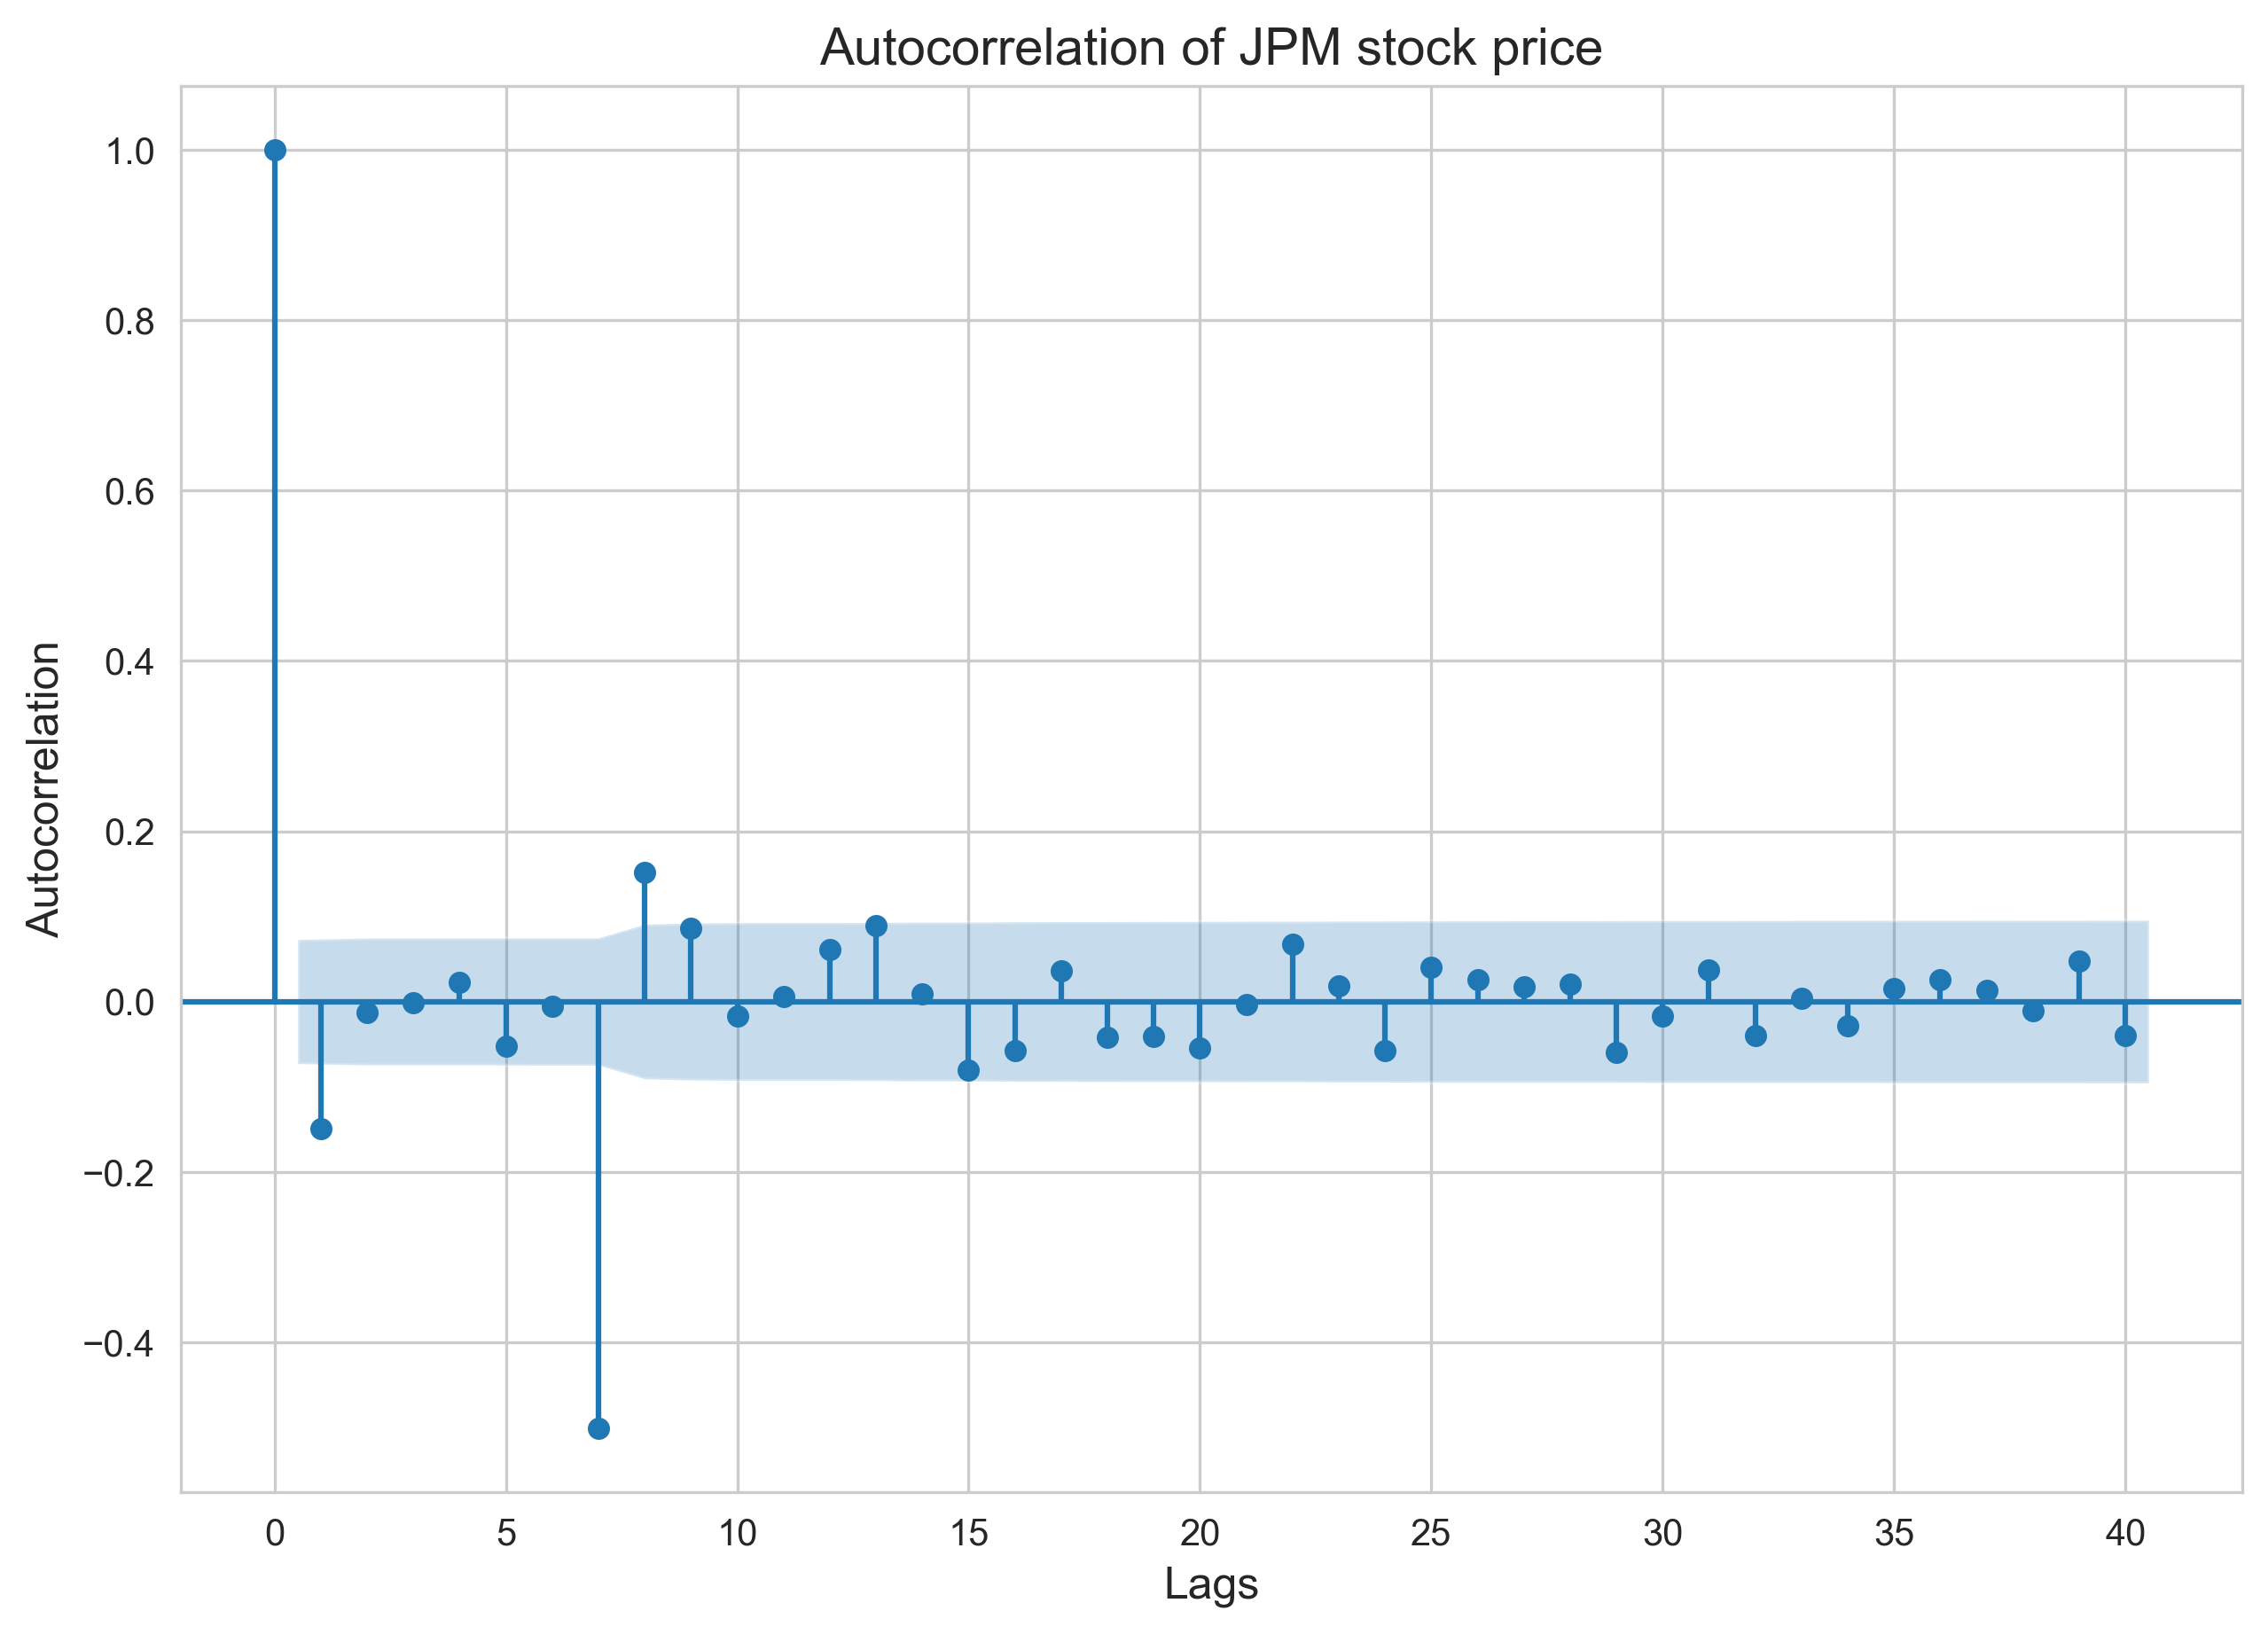

In [97]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(10, 7))
# Plot ACF of JPM stock prices for past 40 lags
plot_acf(diff7, lags=40)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Autocorrelation of JPM stock price', fontsize=14)
plt.show()

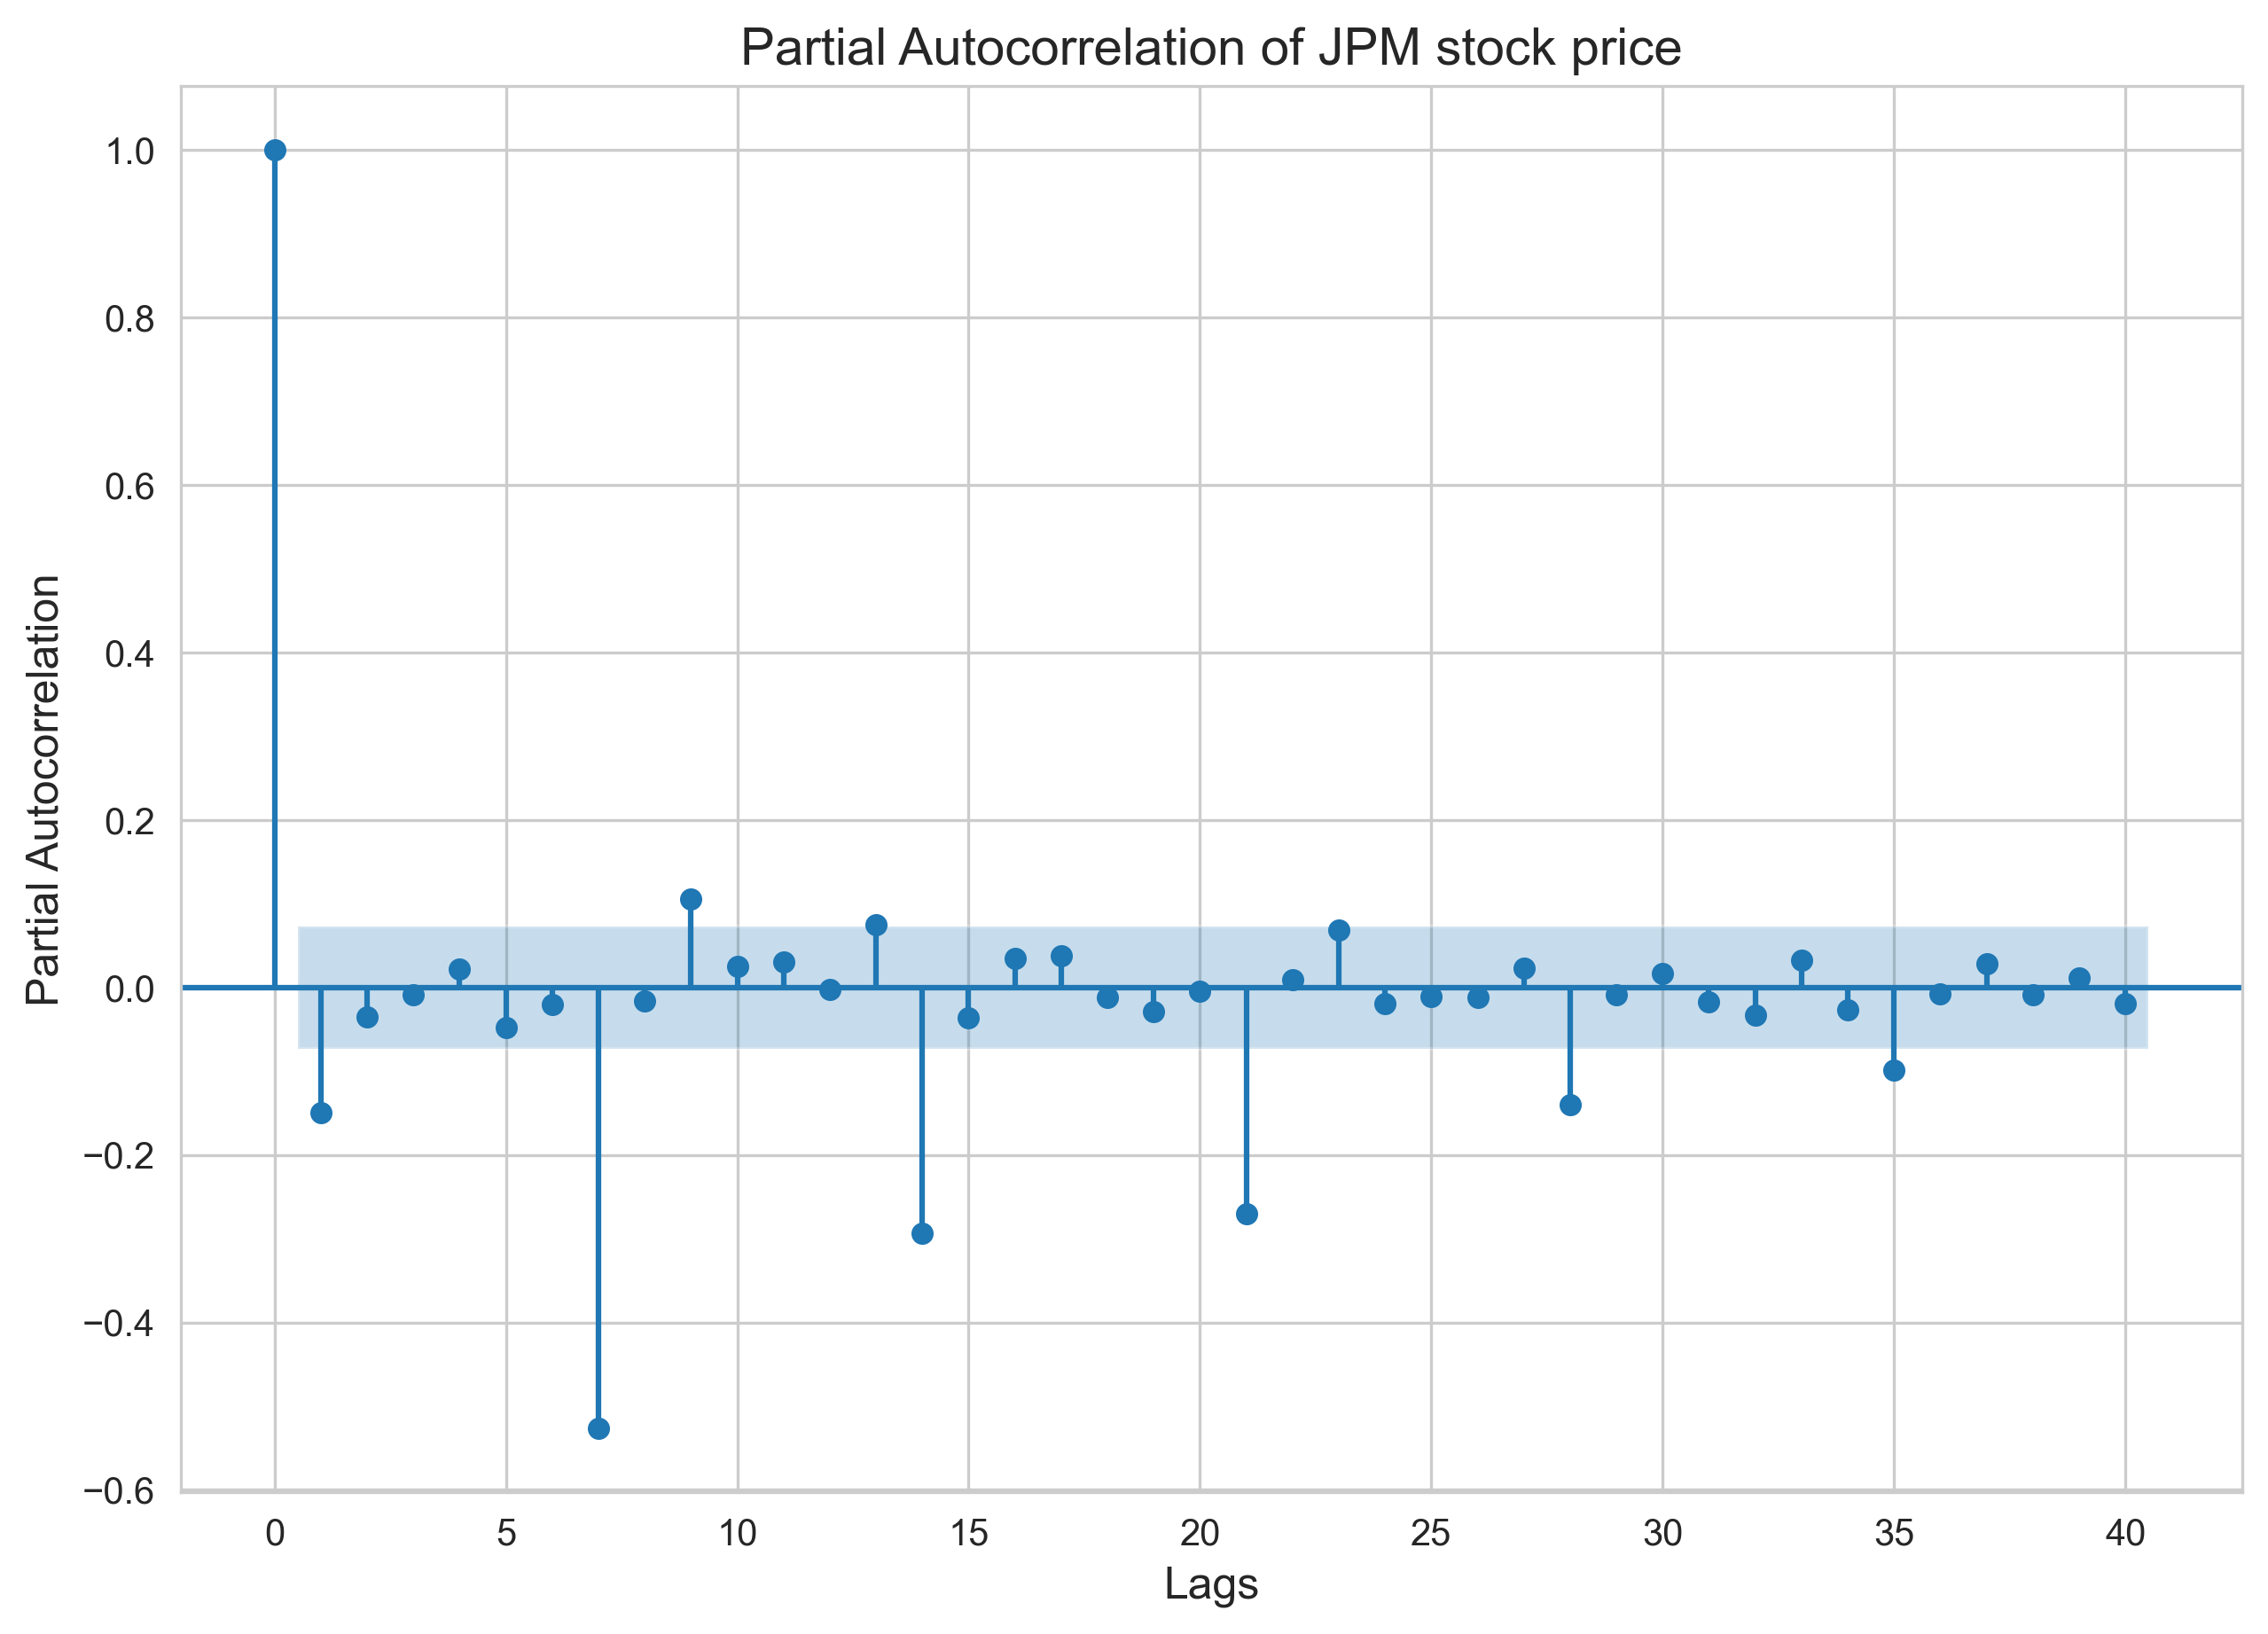

In [98]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF of JPM stock price of past 40 lags
plot_pacf(diff7, lags=40)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.title('Partial Autocorrelation of JPM stock price', fontsize=14)
plt.show()

#### TBATS Model

In [99]:
import pandas as pd
y = df12['PA_Volume_D'].values.tolist()
y_to_train = y[:(len(y)-365)]
y_to_test = y[(len(y)-365):] # last year for testing

In [ ]:
pip install --user tbats

In [100]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_m, x='month', y='PA_Volume_M')
sns.lineplot(data=df_m.tail(6), x='month', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [101]:
y_forecast[0:5]

array([634.73644836, 636.6262648 , 633.75378021, 608.2535027 ,
       230.16378751])

In [102]:
y[0:5]

[94, 437, 614, 591, 598]

In [104]:
len(df12)

1095

In [105]:
days = []
for i in range(len(df12)):
    days.append(i)

In [112]:
y_f = []
for i in range(len(df12)-len(y_forecast)):
    y_f.append(i)
len(y_f)
y_f.extend(y_forecast)
len(y_f)

1095

In [113]:
df_d = pd.DataFrame({"Days": days, "PA_Volume_D": y, "predictions": y_f})

In [114]:
df_d.head()

,Days,PA_Volume_D,predictions
0,0,94,0.0
1,1,437,1.0
2,2,614,2.0
3,3,591,3.0
4,4,598,4.0


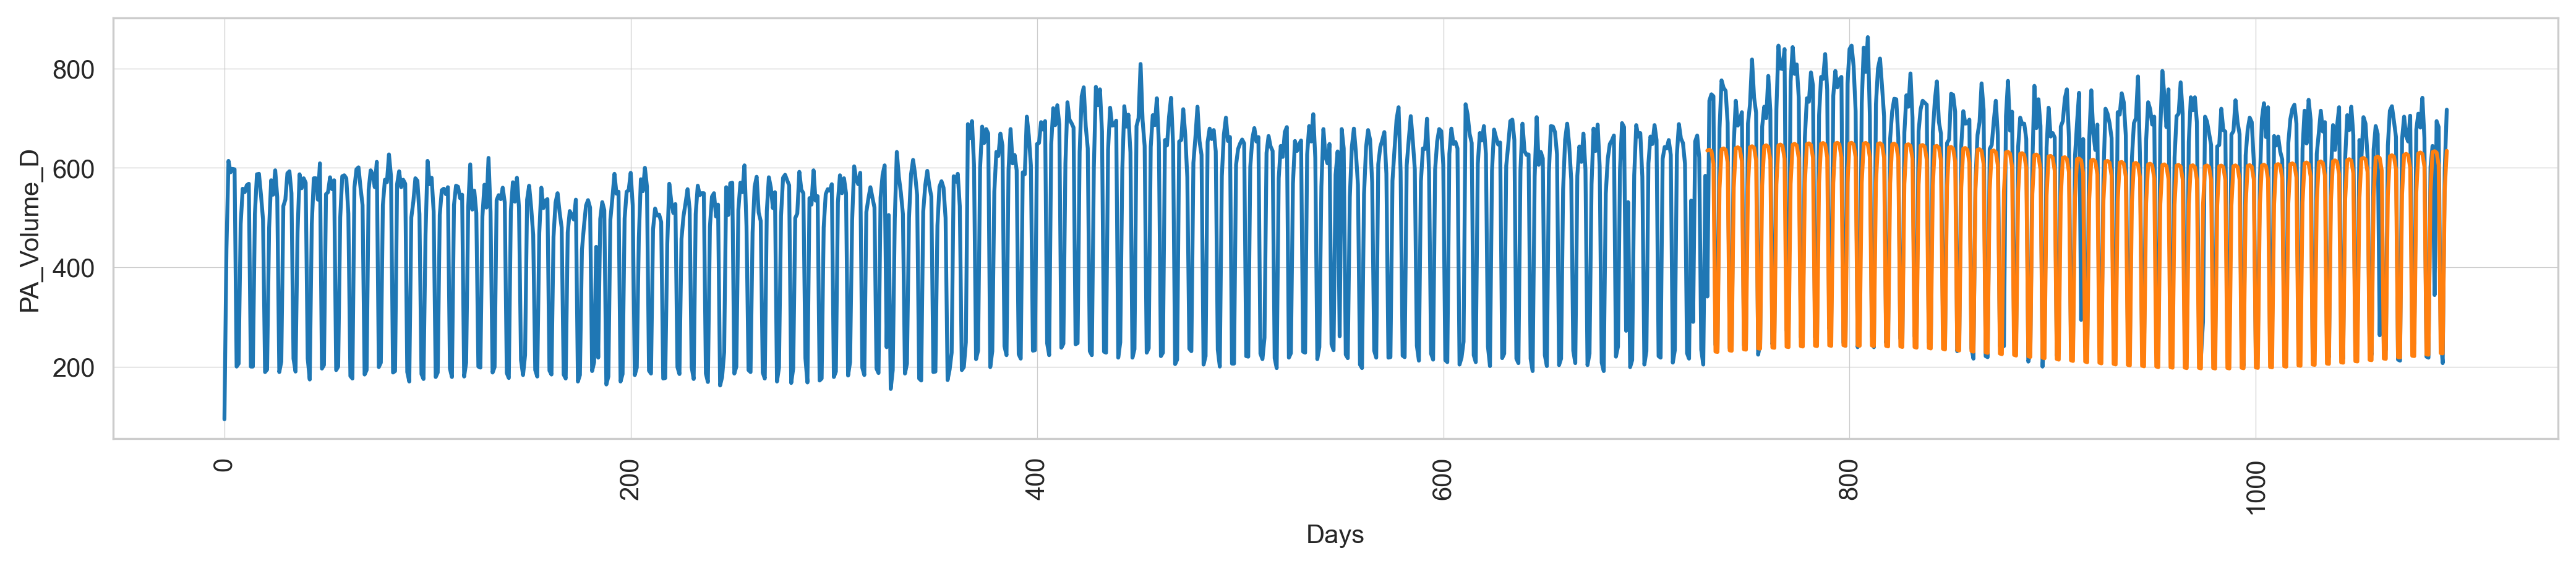

In [115]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_d, x='Days', y='PA_Volume_D')
sns.lineplot(data=df_d.tail(len(y_forecast)), x='Days', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [145]:
y_true = df_d.tail(len(y_forecast)).PA_Volume_D.values
y_pred = df_d.tail(len(y_forecast)).predictions.values

In [147]:
print(r2_score(y_true,y_pred))

0.7878137393077519


In [148]:
print(mean_absolute_error(y_true,y_pred))

81.44846779431973


In [149]:
print(median_absolute_error(y_true,y_pred))

76.95144042656602


In [150]:
print(mean_squared_error(y_true,y_pred))

9904.216801845036


#### Exponential Smoothing

In [122]:
int(0.8*len(df4))

28

In [123]:
X_train = []
for i in range(int(0.8*len(df4))):
    X_train.append(df4.iloc[i][0])

In [124]:
X_test = []
for i in range(int(0.8*len(df4)),len(df4)):
    X_test.append(df4.iloc[i][0])

In [125]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [126]:
ses = SimpleExpSmoothing(X_train)

C:\Users\xushu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [128]:
ses

#### SARIMA Model

In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = X_train
# fit model
model = SARIMAX(data, order=(12, 0, 0), seasonal_order=(0, 0, 0, 12))
model_fit = model.fit(disp=False)

C:\Users\xushu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\xushu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


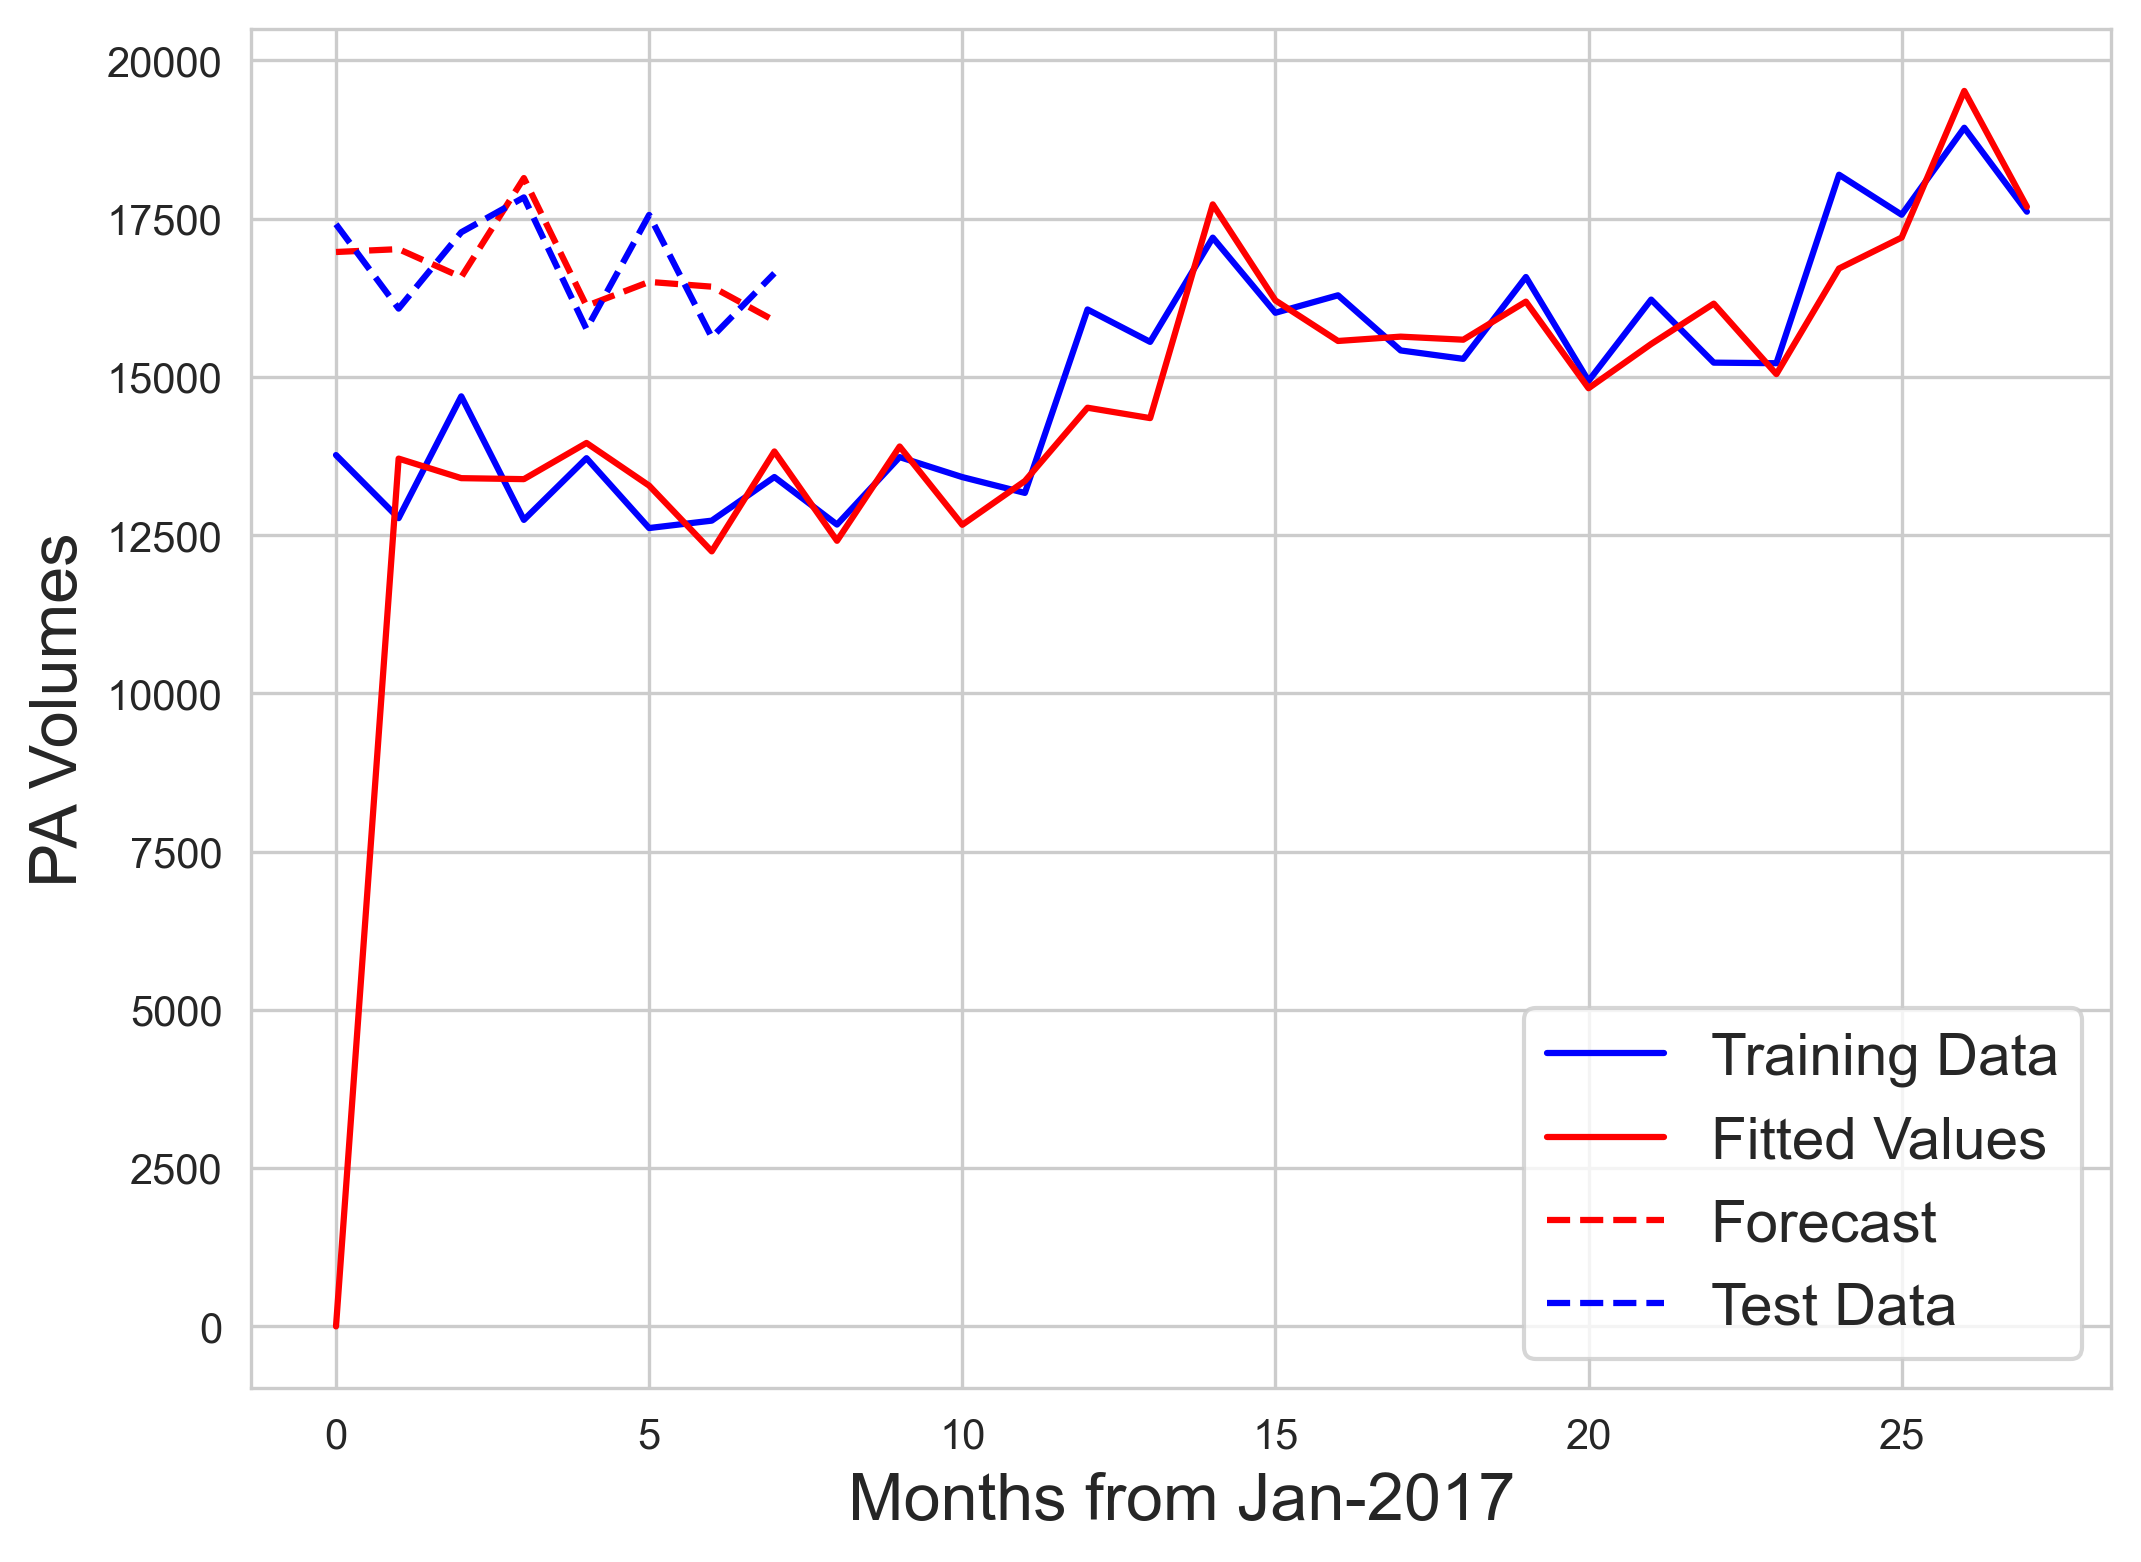

In [130]:
plt.figure(figsize=(8,6))

# plot the training data
plt.plot(X_train,'b',
            label = "Training Data")

# plot the fit
plt.plot(model_fit.fittedvalues,'r-',
            label = "Fitted Values")

# plot the forecast
plt.plot(model_fit.forecast(len(X_test)),'r--',
            label = "Forecast")

plt.plot(X_test,'b--',
            label = "Test Data")

plt.legend(fontsize=14)

plt.xlabel("Months from Jan-2017", fontsize=16)
plt.ylabel("PA Volumes", fontsize=16)

plt.show()

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_m, x='month', y='PA_Volume_M')
sns.lineplot(data=df_m.tail(6), x='month', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [151]:
y_true = X_test
y_pred = model_fit.forecast(len(X_test))

In [153]:
print(r2_score(y_true,y_pred))

0.21733086179127947


In [154]:
print(mean_squared_error(y_true,y_pred))

515836.48826120514


In [155]:
print(mean_absolute_error(y_true,y_pred))

670.884221787401


In [157]:
print(median_absolute_error(y_true,y_pred))

728.6248880713056
